# 1주차(학습)

## Deicision Tree

In [1]:
X = [[0, 0], [1, 1]]
Y = [0, 1]

In [2]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [3]:
# 학습
clf = clf.fit(X, Y)
clf

DecisionTreeClassifier()

In [4]:
clf.predict([[2., 2.]])

array([1])

In [5]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [9]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y = True)
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [8]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

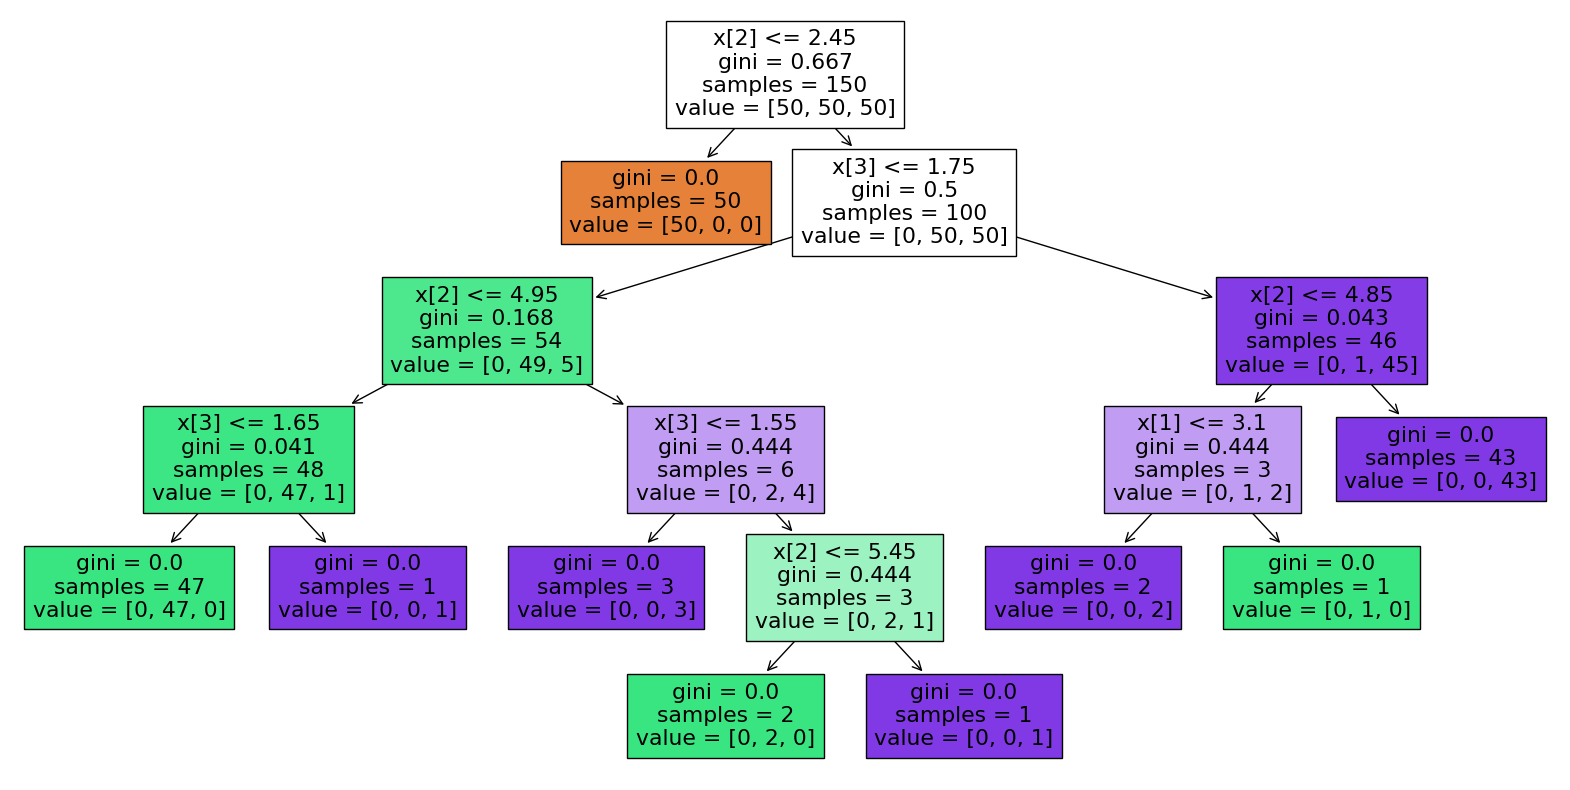

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))
t = tree.plot_tree(clf.fit(X, y), filled = True)

## 당뇨병 데이터셋

### 필요한 라이브러리 로드

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### 데이터셋 로드

In [18]:
data_path = 'C:/Users/taek5/Desktop/TG/boostcourse/data/'

df = pd.read_csv(data_path+'diabetes.csv')
df.shape

(768, 9)

In [19]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

### 학습, 예측 데이터셋 나누기

In [24]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [30]:
train = df[:split_count].copy()
train.shape

(614, 9)

In [33]:
test = df[split_count:].copy()
test.shape

(154, 9)

### 학습, 예측에 사용할 컬럼

In [38]:
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### 정답값이자 예측해야 될 값

In [41]:
label_name = train.columns[-1]
label_name

'Outcome'

### 학습, 예측 데이터셋 만들기

In [45]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [48]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [51]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
614           11      138             74             26      144  36.1   
615            3      106             72              0        0  25.8   
616            6      117             96              0        0  28.7   
617            2       68             62             13       15  20.1   
618            9      112             82             24        0  28.2   

     DiabetesPedigreeFunction  Age  
614                     0.557   50  
615                     0.207   27  
616                     0.157   30  
617                     0.257   23  
618                     1.282   50

In [52]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

### 머신러닝 알고리즘 가져오기

In [85]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model

DecisionTreeClassifier(random_state=42)

### 학습(훈련)

In [86]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 예측

In [87]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

### 트리 알고리즘 분석하기

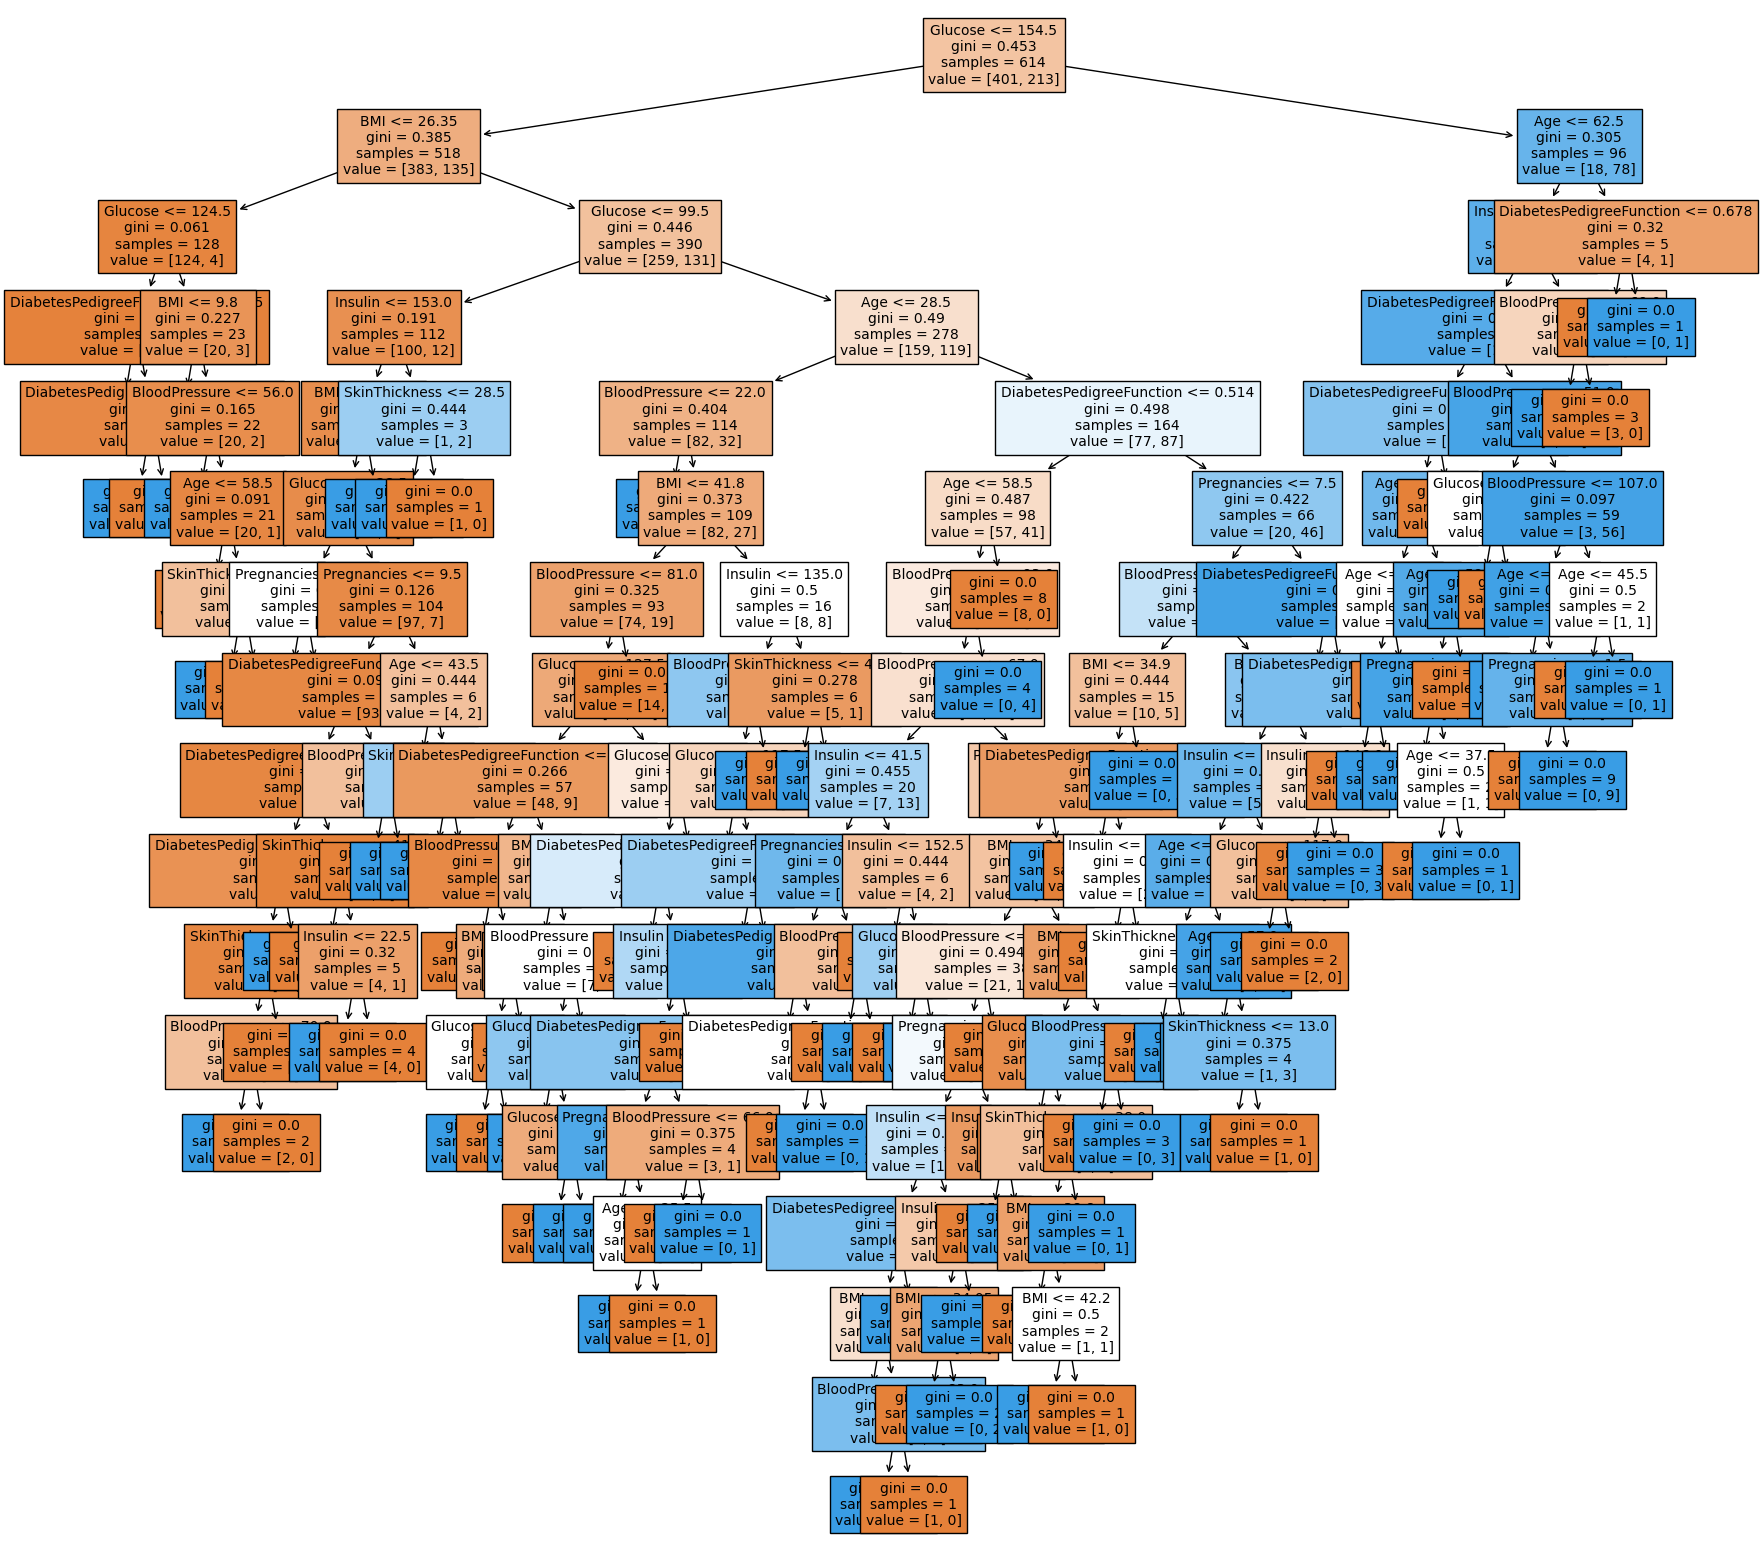

In [88]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20, 20))
tree = plot_tree(model, 
                 feature_names = feature_names,
                 filled = True,
                 fontsize = 10)

In [89]:
# 피처의 중요도 추출하기
model.feature_importances_

array([0.05944171, 0.30368248, 0.13140431, 0.04020035, 0.09010707,
       0.15739296, 0.12077948, 0.09699165])

<Axes: >

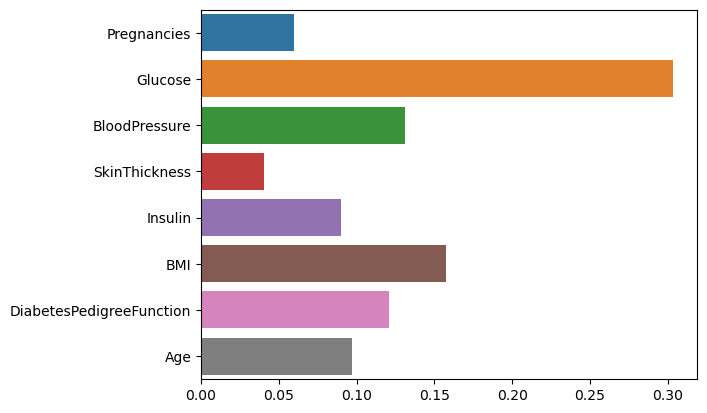

In [90]:
# 피쳐의 중요도 시각화
sns.barplot(x = model.feature_importances_, y = feature_names)

### 정확도(Accuracy) 측정하기

In [92]:
diff_count = abs(y_test - y_predict).sum()
diff_count

9

In [96]:
(len(y_test) - diff_count) / len(y_test) * 100

94.15584415584416

In [98]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

94.15584415584416

In [100]:
model.score(X_test, y_test) * 100

94.15584415584416

# 1주차(미션)

In [1]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# 데이터 로드
df = pd.read_csv('https://bit.ly/telco-csv', index_col = 'customerID')
print(df.shape)
df.head()

(7043, 20)


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges TotalCharges Churn  
customerID                                     
7590-VHVEG           29.85        29.85    No  
5575-GNVDE           56.95       1889.5    No  
3668-QPYBK           53.85       108.15   Yes  
7795-CFOCW           42.30      1840.75    No  
9237-HQITU           70.70       151.65   Yes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [7]:
# 컬럼별 결측치 확인
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 2주차(학습)

## 당뇨병 데이터셋 미리보기

### 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### 데이터 로드

In [2]:
data_path = 'C:/Users/taek5/Desktop/TG/boostcourse/data/'

df = pd.read_csv(data_path+'diabetes.csv')
df.shape

(768, 9)

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# 결측치 확인
df_null = df.isnull()
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# 수치데이터 요약
df.describe(include = 'number') # object타입도 출력 가능

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [18]:
# target변수 제외
feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### 결측치 시각화

In [20]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [23]:
# 0값을 결측치라 가정하고 정답(label, target)값을 제외한 컬럼에 대해
# 결측치 여부를 구해서 df_null 이라는 데이터프레임에 담습니다.
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [28]:
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<Axes: >

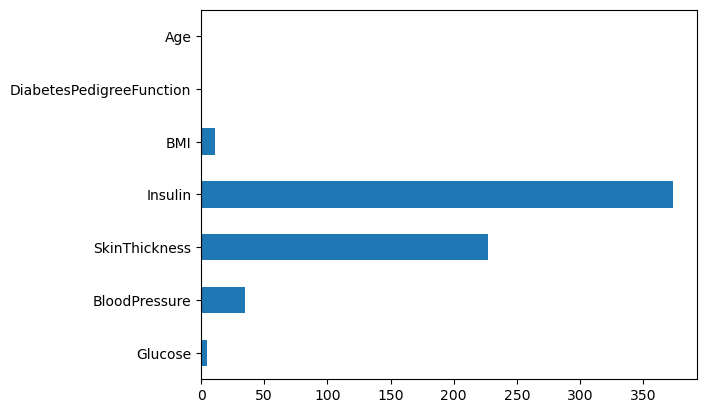

In [26]:
# 결측치 갯수 시각화
df_null.sum().plot.barh()

<Axes: >

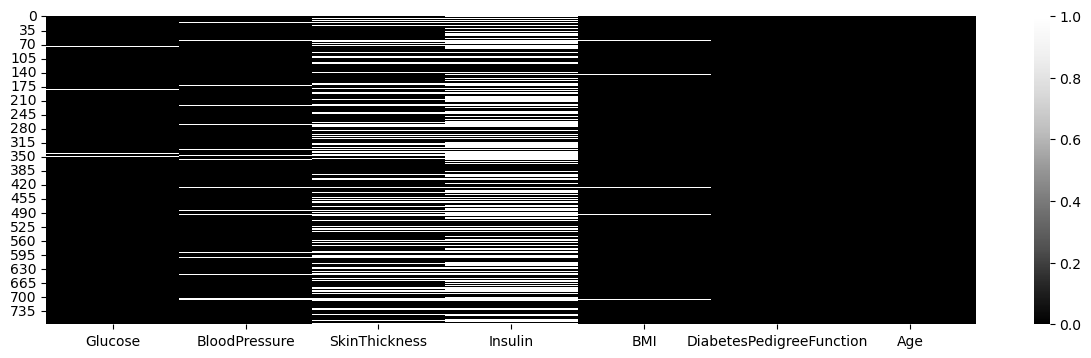

In [34]:
# heatmap 시각화
plt.figure(figsize = (15, 4))
sns.heatmap(df_null, cmap = 'Greys_r')

### 정답값

In [36]:
# Outcome 갯수 확인
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [37]:
# Outcome 비율 확인
df['Outcome'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [43]:
# 임신횟수와 정답값 비교
# Pregnancies를 groupby로 그룹화 해서 Outcome에 대한 비율 확인
df_po = df.groupby((['Pregnancies']))['Outcome'].agg(['mean', 'count']).reset_index()
df_po

Pregnancies      mean  count
0             0  0.342342    111
1             1  0.214815    135
2             2  0.184466    103
3             3  0.360000     75
4             4  0.338235     68
5             5  0.368421     57
6             6  0.320000     50
7             7  0.555556     45
8             8  0.578947     38
9             9  0.642857     28
10           10  0.416667     24
11           11  0.636364     11
12           12  0.444444      9
13           13  0.500000     10
14           14  1.000000      2
15           15  1.000000      1
16           17  1.000000      1

<Axes: >

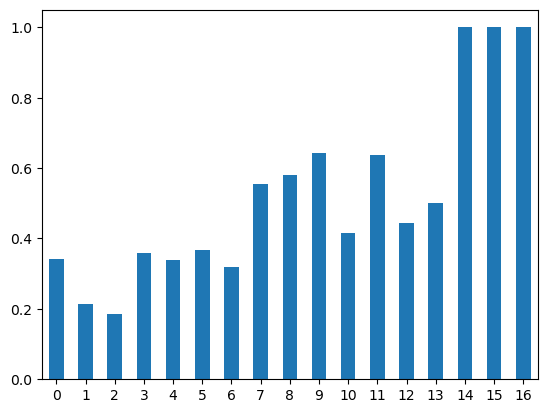

In [48]:
# 임신횟수에 따른 당뇨병 발병 비율
df_po['mean'].plot.bar(rot = 0) # rot는 글씨 회전

### countplot

<Axes: xlabel='Outcome', ylabel='count'>

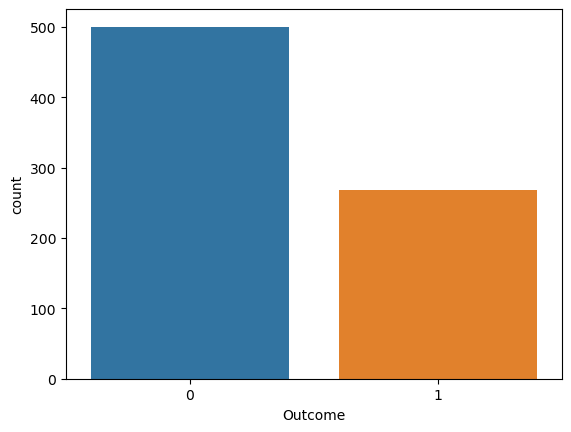

In [49]:
# 당뇨병 발병 빈도수 비교
sns.countplot(data = df, x = 'Outcome')

<Axes: xlabel='Pregnancies', ylabel='count'>

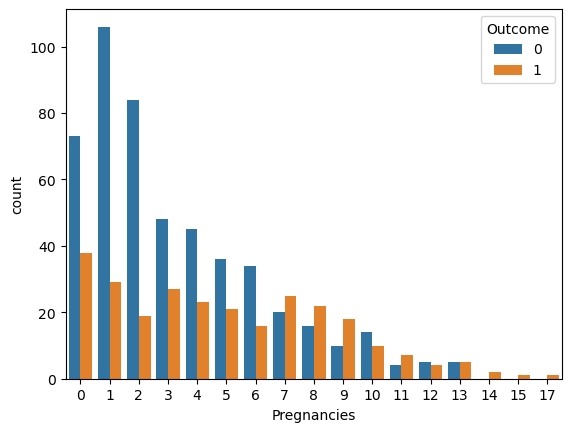

In [51]:
# 임신횟수에 따른 당뇨병 발병 빈도수 비교
sns.countplot(data = df, x = 'Pregnancies', hue = 'Outcome')

In [54]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high 변수를 만듭니다.
df['Pregnancies_high']= df['Pregnancies'] > 6
df[['Pregnancies', 'Pregnancies_high']].head()

Pregnancies  Pregnancies_high
0            6             False
1            1             False
2            8              True
3            1             False
4            0             False

<Axes: xlabel='Pregnancies_high', ylabel='count'>

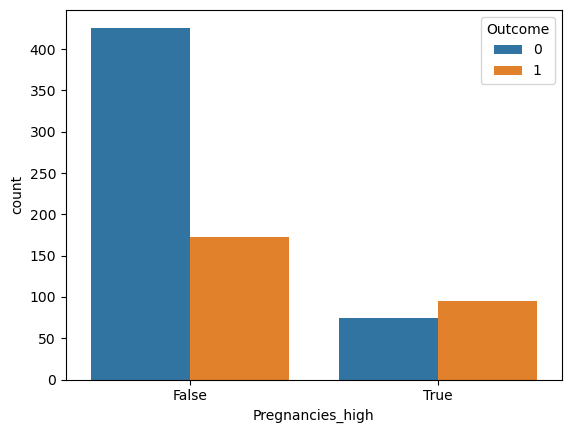

In [56]:
# Pregnancies_high 변수의 빈도수를 countplot으로 그리고
# Outcome 값에 따라 다른 색상으로 표현합니다.
sns.countplot(data = df, x = 'Pregnancies_high', hue = 'Outcome')

### barplot

<Axes: xlabel='Outcome', ylabel='BMI'>

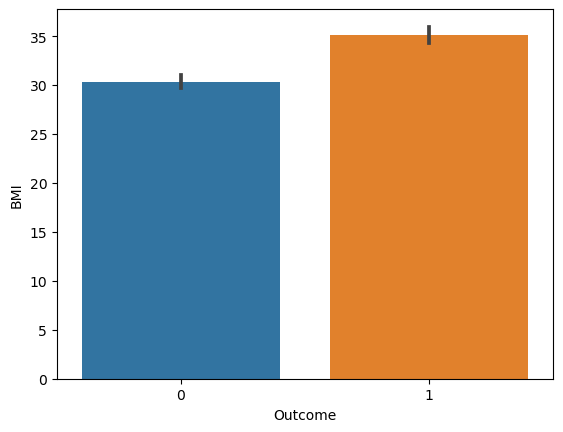

In [57]:
# 당뇨병 발병에 따른 BMI 수치 비교
sns.barplot(data = df, x = 'Outcome', y = 'BMI')

<Axes: xlabel='Outcome', ylabel='Glucose'>

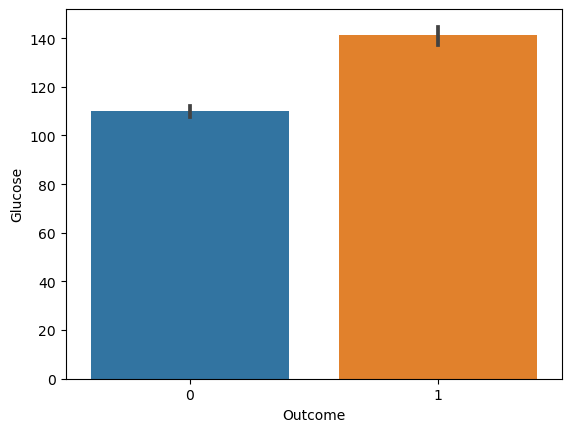

In [58]:
# 당뇨병 발병에 따른 포도당 수치 비교
sns.barplot(data = df, x = 'Outcome', y = 'Glucose')

<Axes: xlabel='Outcome', ylabel='Insulin'>

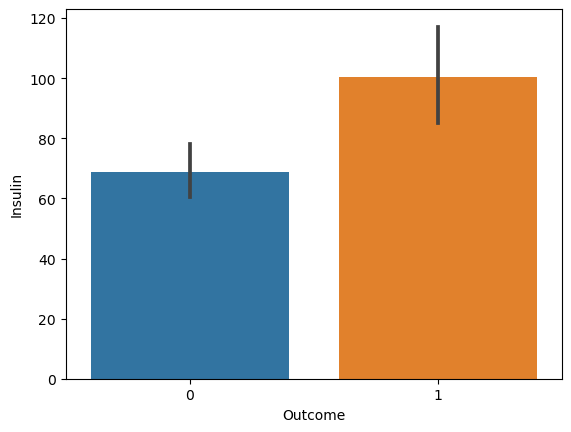

In [59]:
# Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병 비교
sns.barplot(data = df, x = 'Outcome', y = 'Insulin')

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

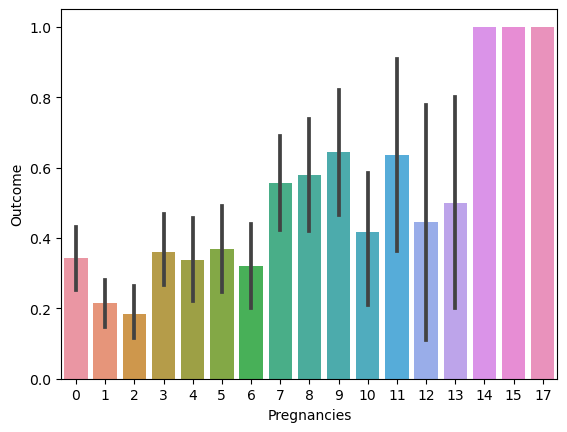

In [60]:
# 임신횟수에 대해서 당뇨병 발병 비율 비교
sns.barplot(data = df, x = 'Pregnancies', y = 'Outcome')

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

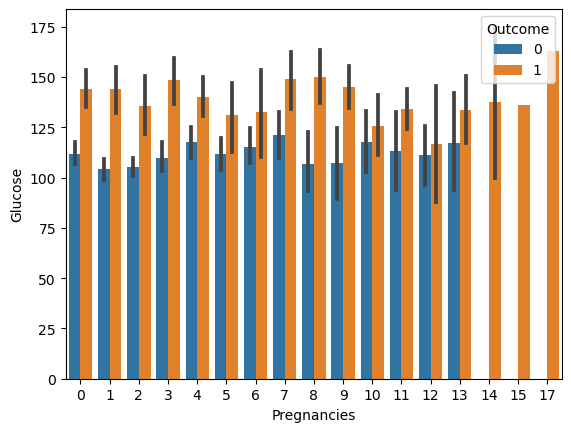

In [62]:
# 임신횟수에 따른 포도당 수치를 당뇨병 발병여부에 따라 시각화
sns.barplot(data = df, x = 'Pregnancies', y = 'Glucose', hue = 'Outcome')

<Axes: xlabel='Pregnancies', ylabel='BMI'>

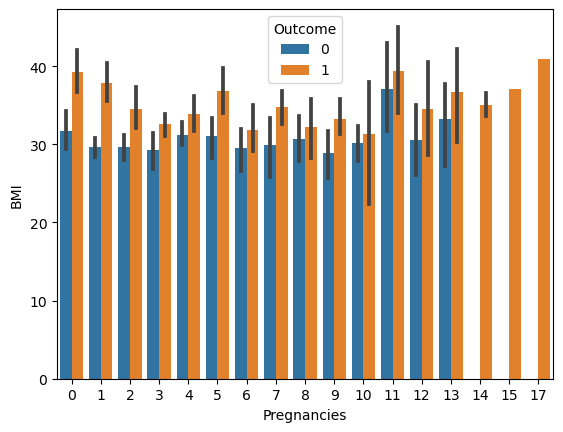

In [64]:
# 임신횟수에 따른 체지방지수를 당뇨병 발병여부에 따라 시각화
sns.barplot(data = df, x = 'Pregnancies', y = 'BMI', hue = 'Outcome')

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

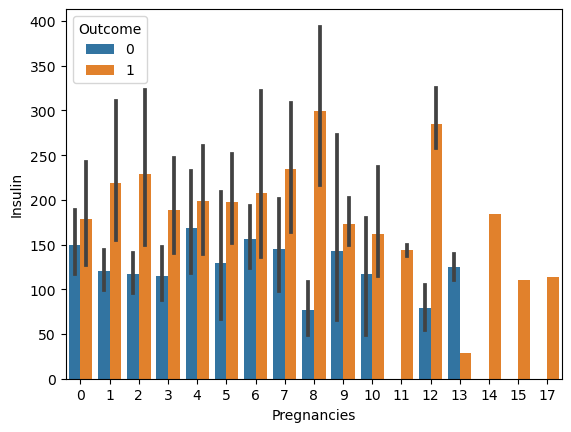

In [68]:
# 임신횟수에 따른 인슐린 수치를 당뇨병 발병여부에 따라 시각화
# 인슐린 수치에서 결측치가 많기 때문에 0보다 큰 값에 대해서만 시각화
sns.barplot(data = df[df['Insulin'] > 0], 
            x = 'Pregnancies',
            y = 'Insulin', 
            hue = 'Outcome')

### boxplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

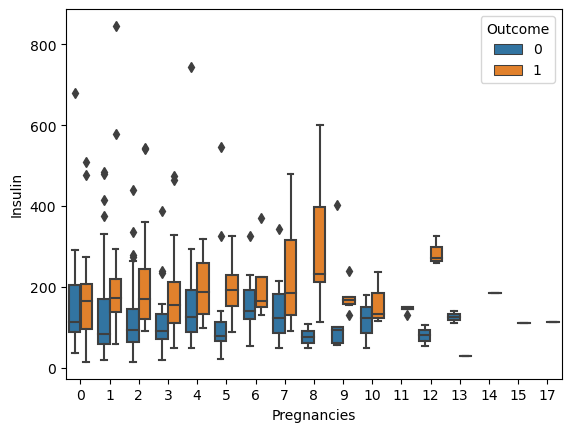

In [67]:
# 임신횟수에 따른 인슐린 수치를 당뇨병 발병여부에 따라 시각화
# 인슐린 수치에서 결측치가 많기 때문에 0보다 큰 값에 대해서만 시각화
sns.boxplot(data = df[df['Insulin'] > 0], 
            x = 'Pregnancies', 
            y = 'Insulin', 
            hue = 'Outcome')

### violinplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

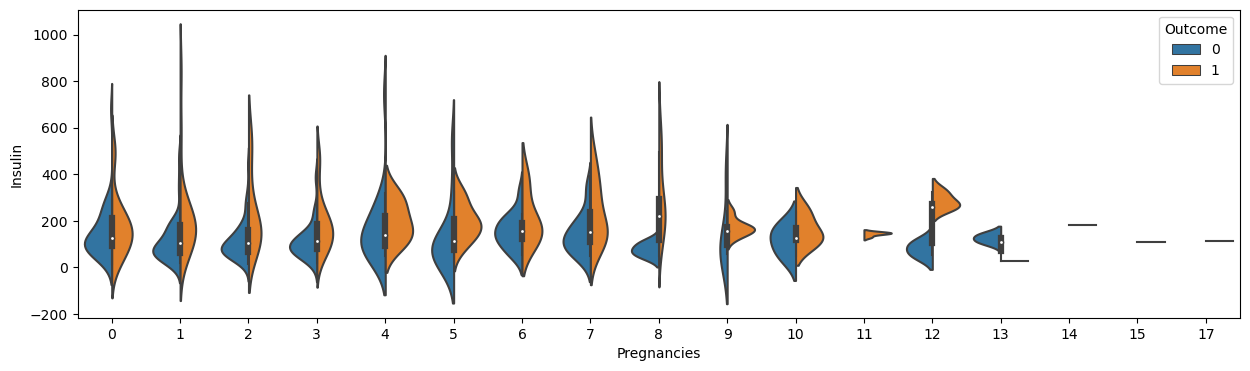

In [71]:
# violinplot으로 시각화
plt.figure(figsize = (15, 4))
sns.violinplot(data = df[df['Insulin'] > 0], 
               x = 'Pregnancies', 
               y = 'Insulin', 
               hue = 'Outcome',
              split = True)

### swarmplot

C:\Users\taek5\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\taek5\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\taek5\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

C:\Users\taek5\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


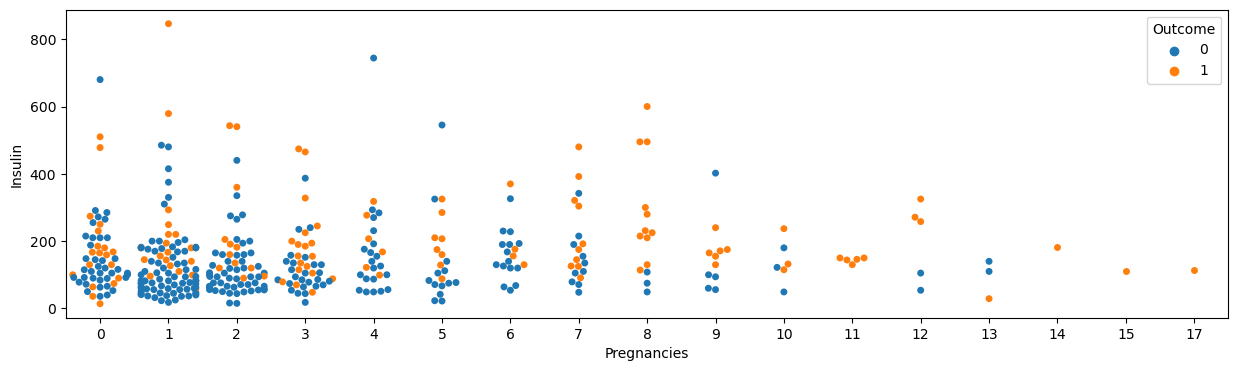

In [73]:
# swarmplot으로 시각화
plt.figure(figsize = (15, 4))
sns.swarmplot(data = df[df['Insulin'] > 0], 
               x = 'Pregnancies', 
               y = 'Insulin', 
               hue = 'Outcome')

### distplot

In [78]:
df_0 = df[df['Outcome'] == 0]
df_1 = df[df['Outcome'] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

C:\Users\taek5\AppData\Local\Temp\ipykernel_21200\3403687851.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['Pregnancies'])
C:\Users\taek5\AppData\Local\Temp\ipykernel_21200\3403687851.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['Pregnancies'])


<Axes: xlabel='Pregnancies', ylabel='Density'>

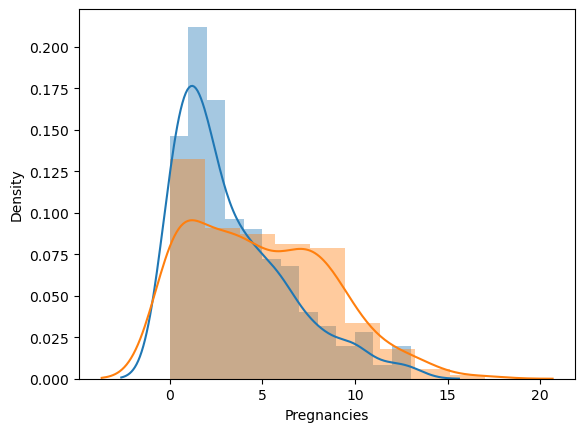

In [80]:
# 임신횟수에 따른 당뇨병 발병 여부 시각화
sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'])

C:\Users\taek5\AppData\Local\Temp\ipykernel_21200\2143680025.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['Age'], hist = False, rug = True, label = 0)
C:\Users\taek5\AppData\Local\Temp\ipykernel_21200\2143680025.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df

<Axes: xlabel='Age', ylabel='Density'>

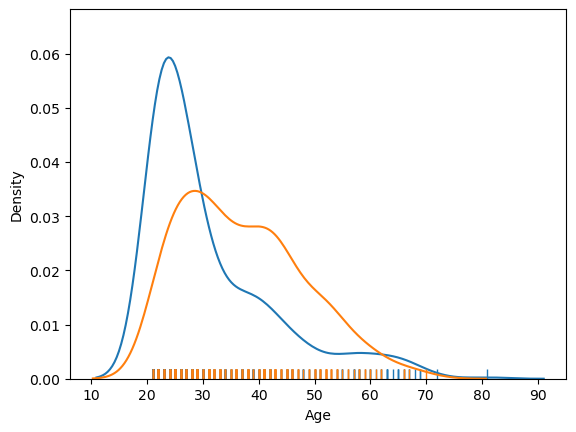

In [89]:
# 나이에 따른 당뇨병 발병 여부 시각화
sns.distplot(df_0['Age'], hist = False, rug = True, label = 0) # label이 안나옴 
sns.distplot(df_1['Age'], hist = False, rug = True, label = 1)

### Subplots

#### Pandas를 통한 histplot

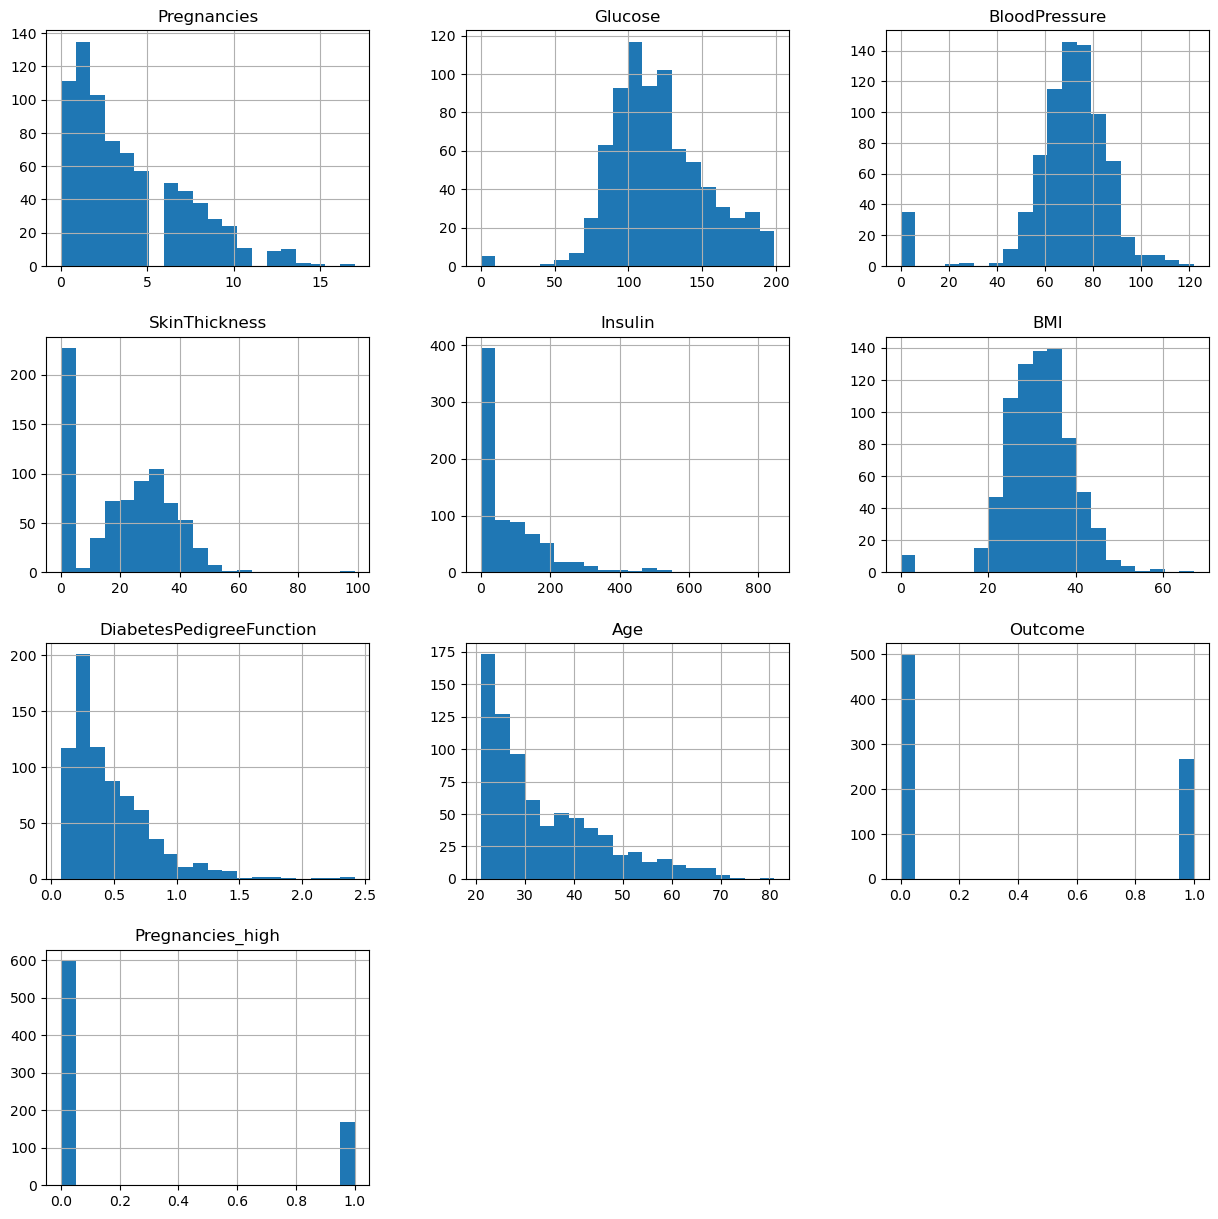

In [97]:
df['Pregnancies_high'] = df['Pregnancies_high'].astype(int)
h = df.hist(figsize = (15, 15), bins = 20)

#### 반복문을 통한 Subplots

##### distplot

In [101]:
# 컬럼의 수 만큼 for 문을 만들어서 서브플롯으로 시각화
col_num = df.columns.shape
col_num

(10,)

In [110]:
cols = df.columns[:-1].tolist()

C:\Users\taek5\AppData\Local\Temp\ipykernel_21200\3942215601.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax = axes[row][col])
C:\Users\taek5\AppData\Local\Temp\ipykernel_21200\3942215601.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax = axes[row][col])


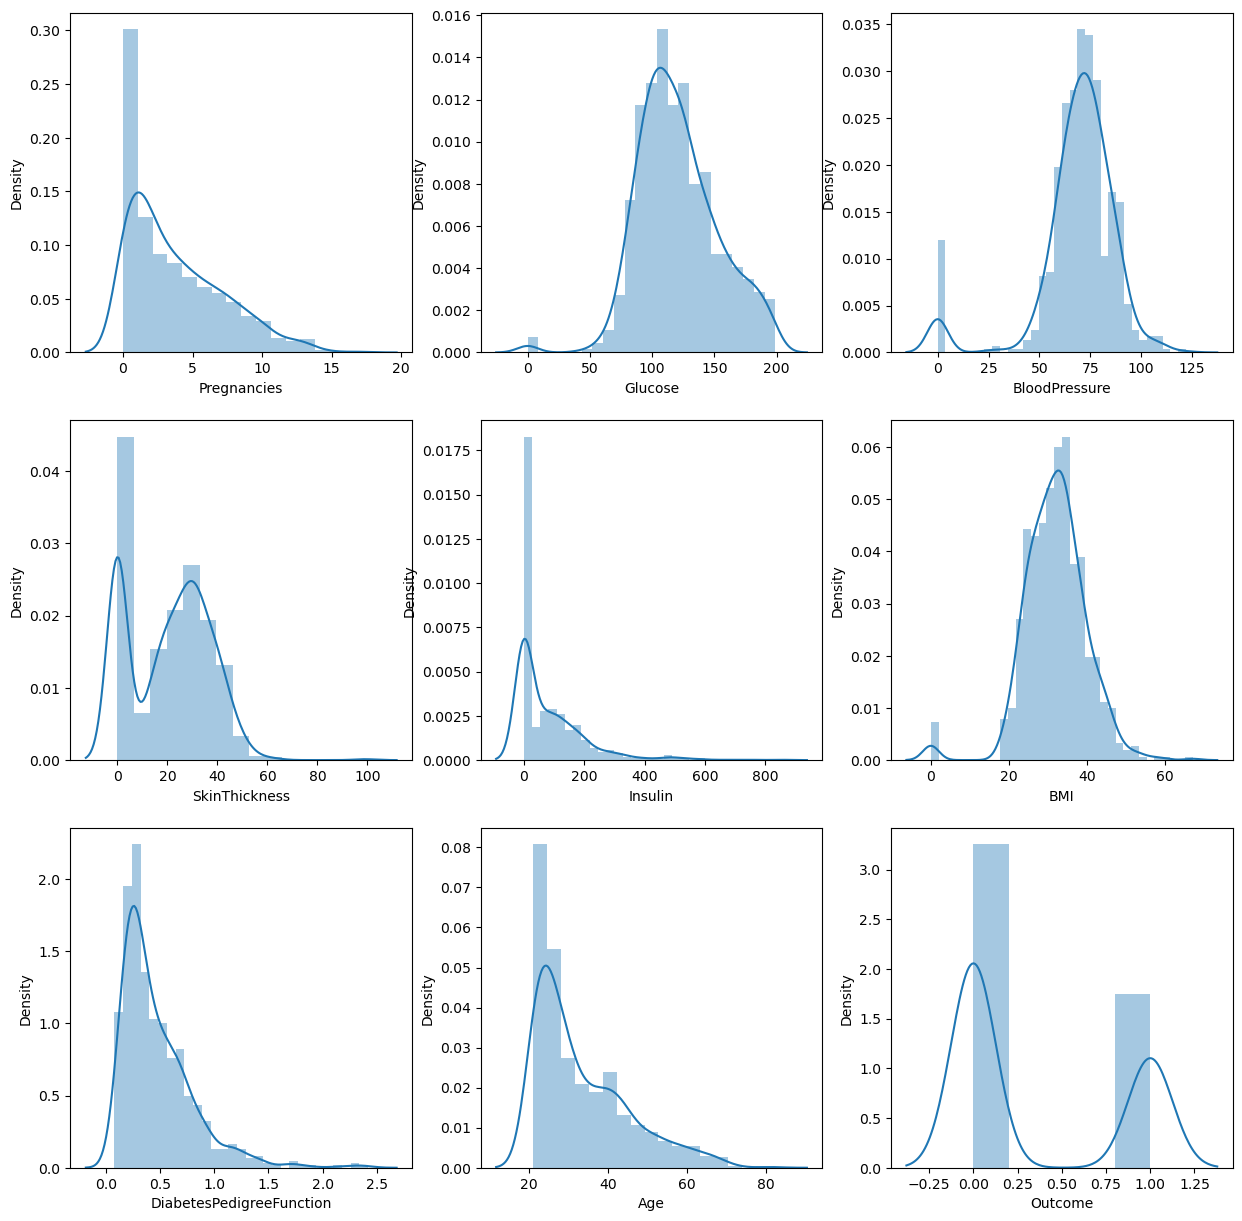

In [116]:
# distplot으로 서브플롯
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))

for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3
    sns.distplot(df[col_name], ax = axes[row][col])

C:\Users\taek5\AppData\Local\Temp\ipykernel_21200\2166461088.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[col_name], ax = axes[row][col])
C:\Users\taek5\AppData\Local\Temp\ipykernel_21200\2166461088.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[col_name], ax = axes[row][co

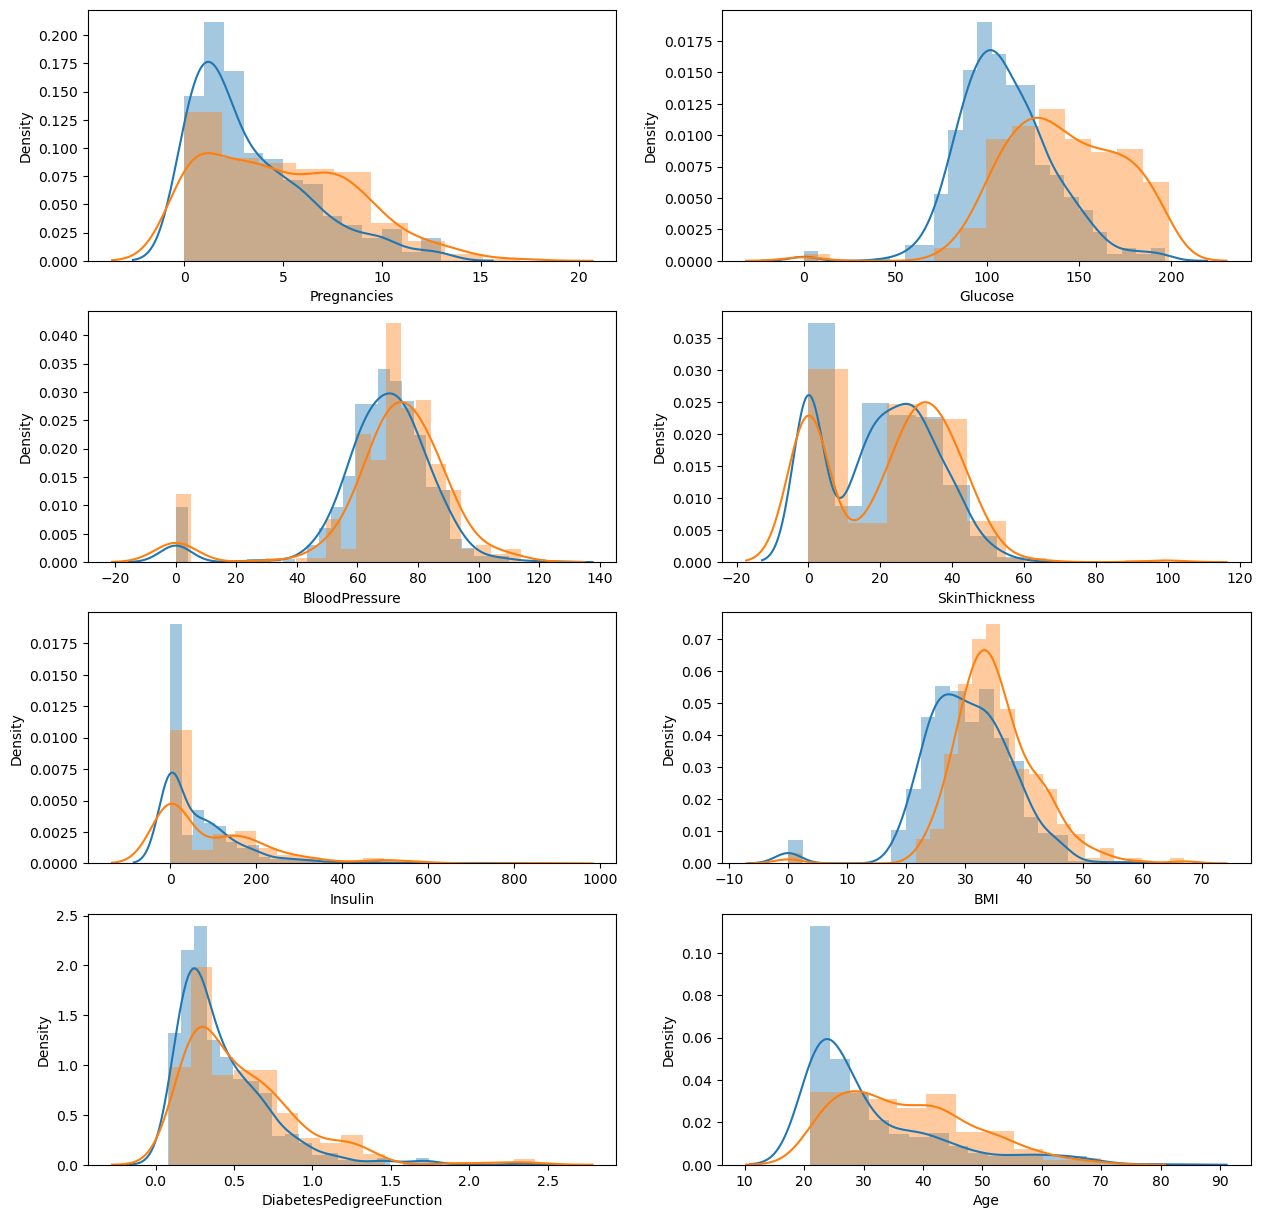

In [120]:
# distplot으로 서브플롯
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.distplot(df_0[col_name], ax = axes[row][col])
    sns.distplot(df_1[col_name], ax = axes[row][col])

##### violineplot

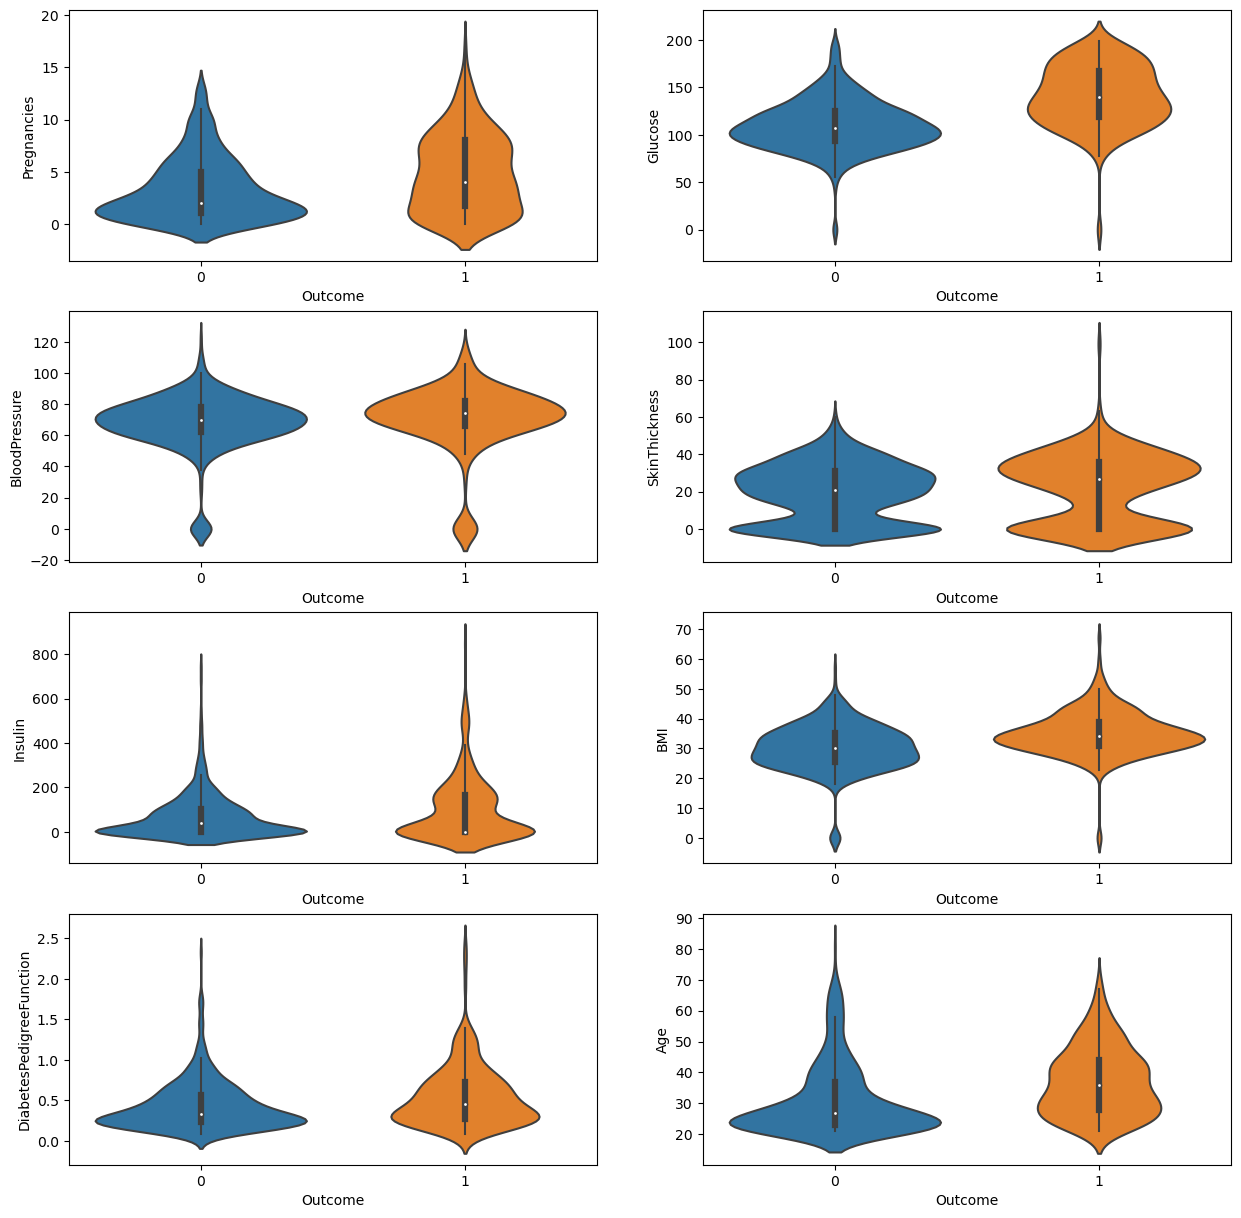

In [122]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.violinplot(data = df, x = 'Outcome', y = col_name, ax = axes[row][col])

#### Implot

<Axes: xlabel='Glucose', ylabel='Insulin'>

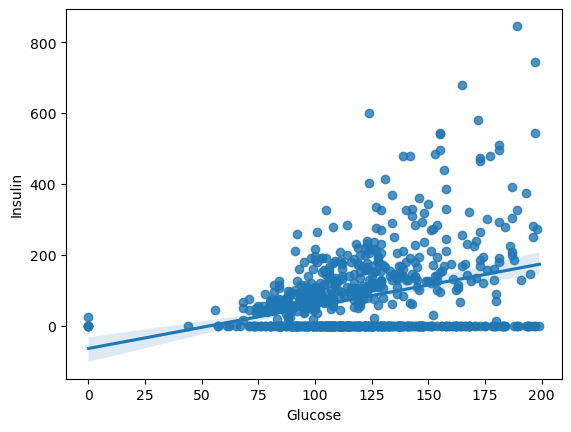

In [123]:
# Glucose와 Insulin을 Outcome으로 구분
sns.regplot(data = df, x = 'Glucose', y = 'Insulin')

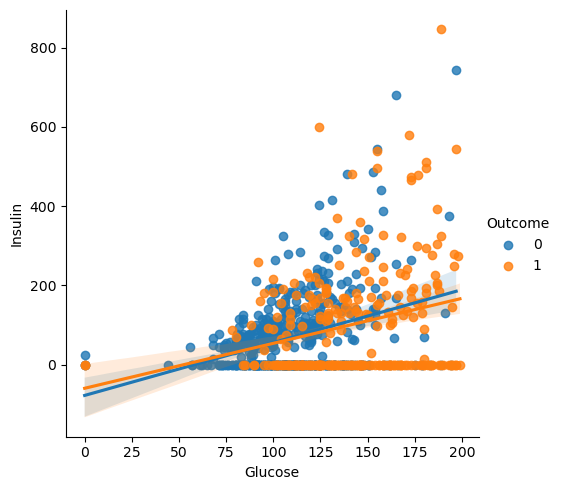

In [126]:
# Glucose와 Insulin을 Outcome으로 구분
sns.lmplot(data = df, x = 'Glucose', y = 'Insulin', hue = 'Outcome')

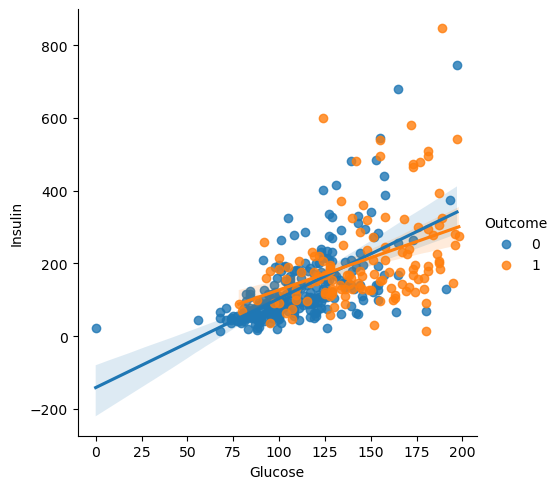

In [127]:
# Insulin 수치가 0 이상인 데이터
sns.lmplot(data = df[df['Insulin'] > 0], x = 'Glucose', y = 'Insulin', hue = 'Outcome')

#### pairplot

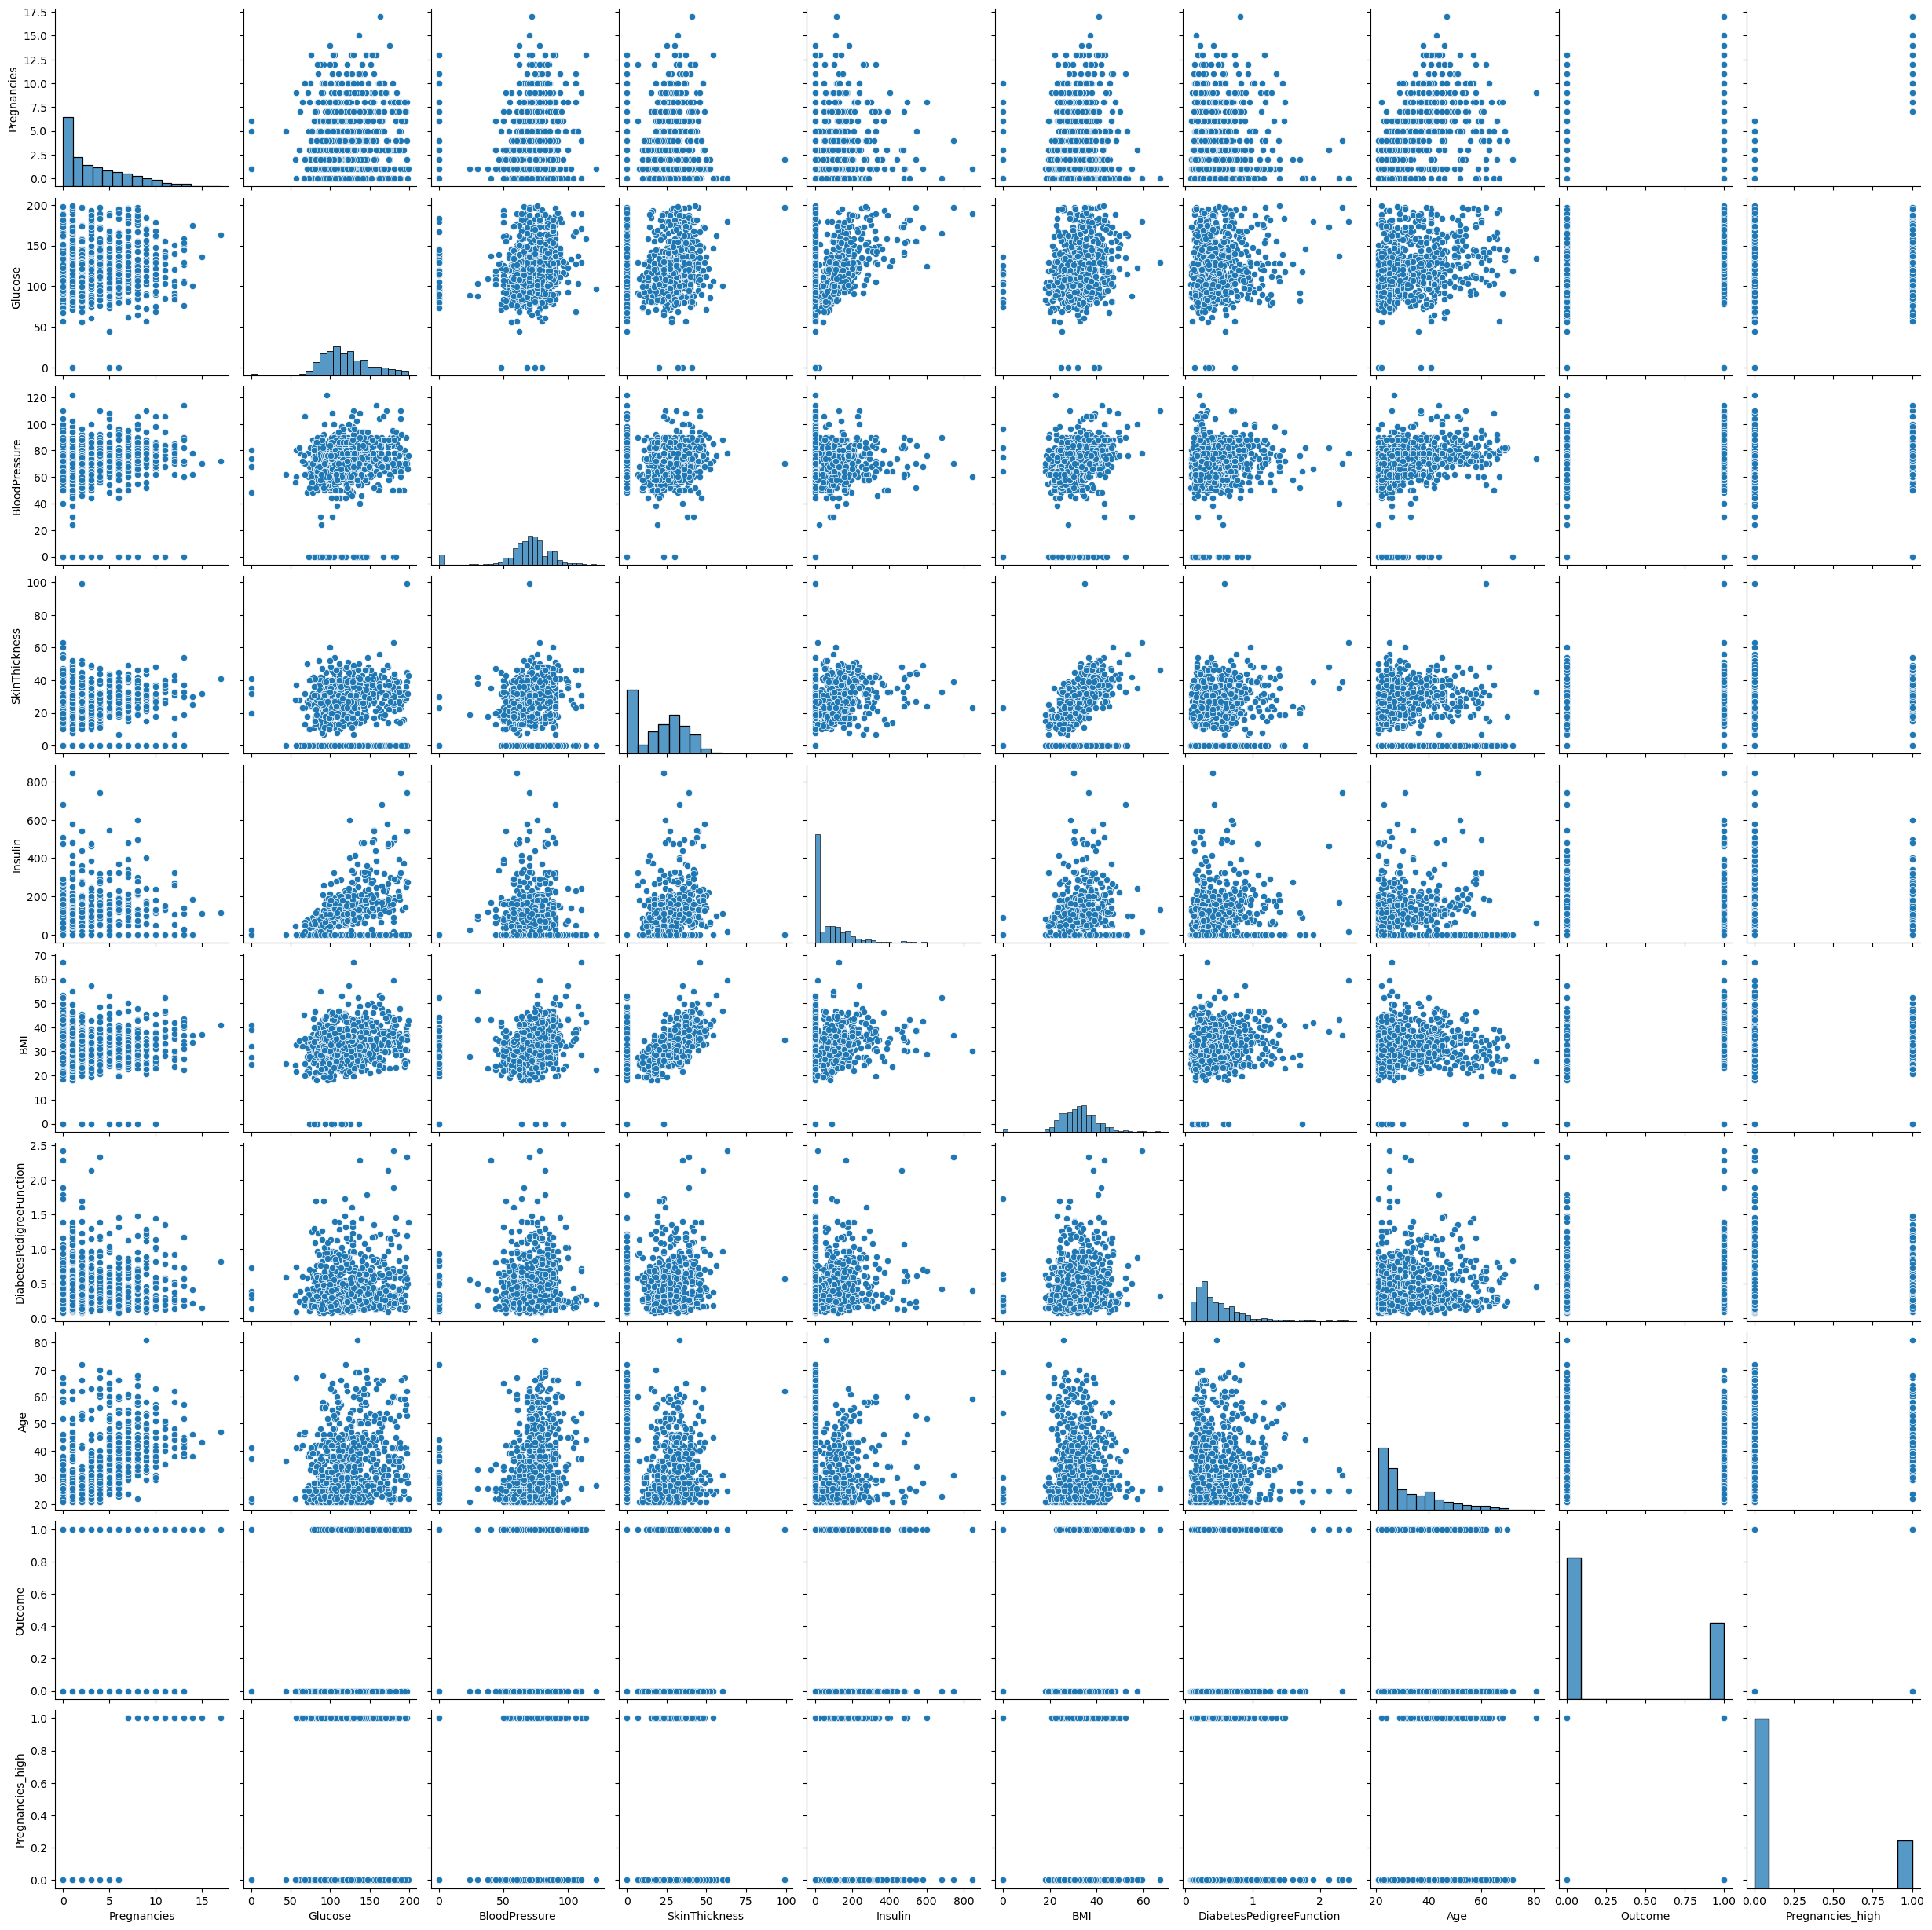

In [128]:
sns.pairplot(df)

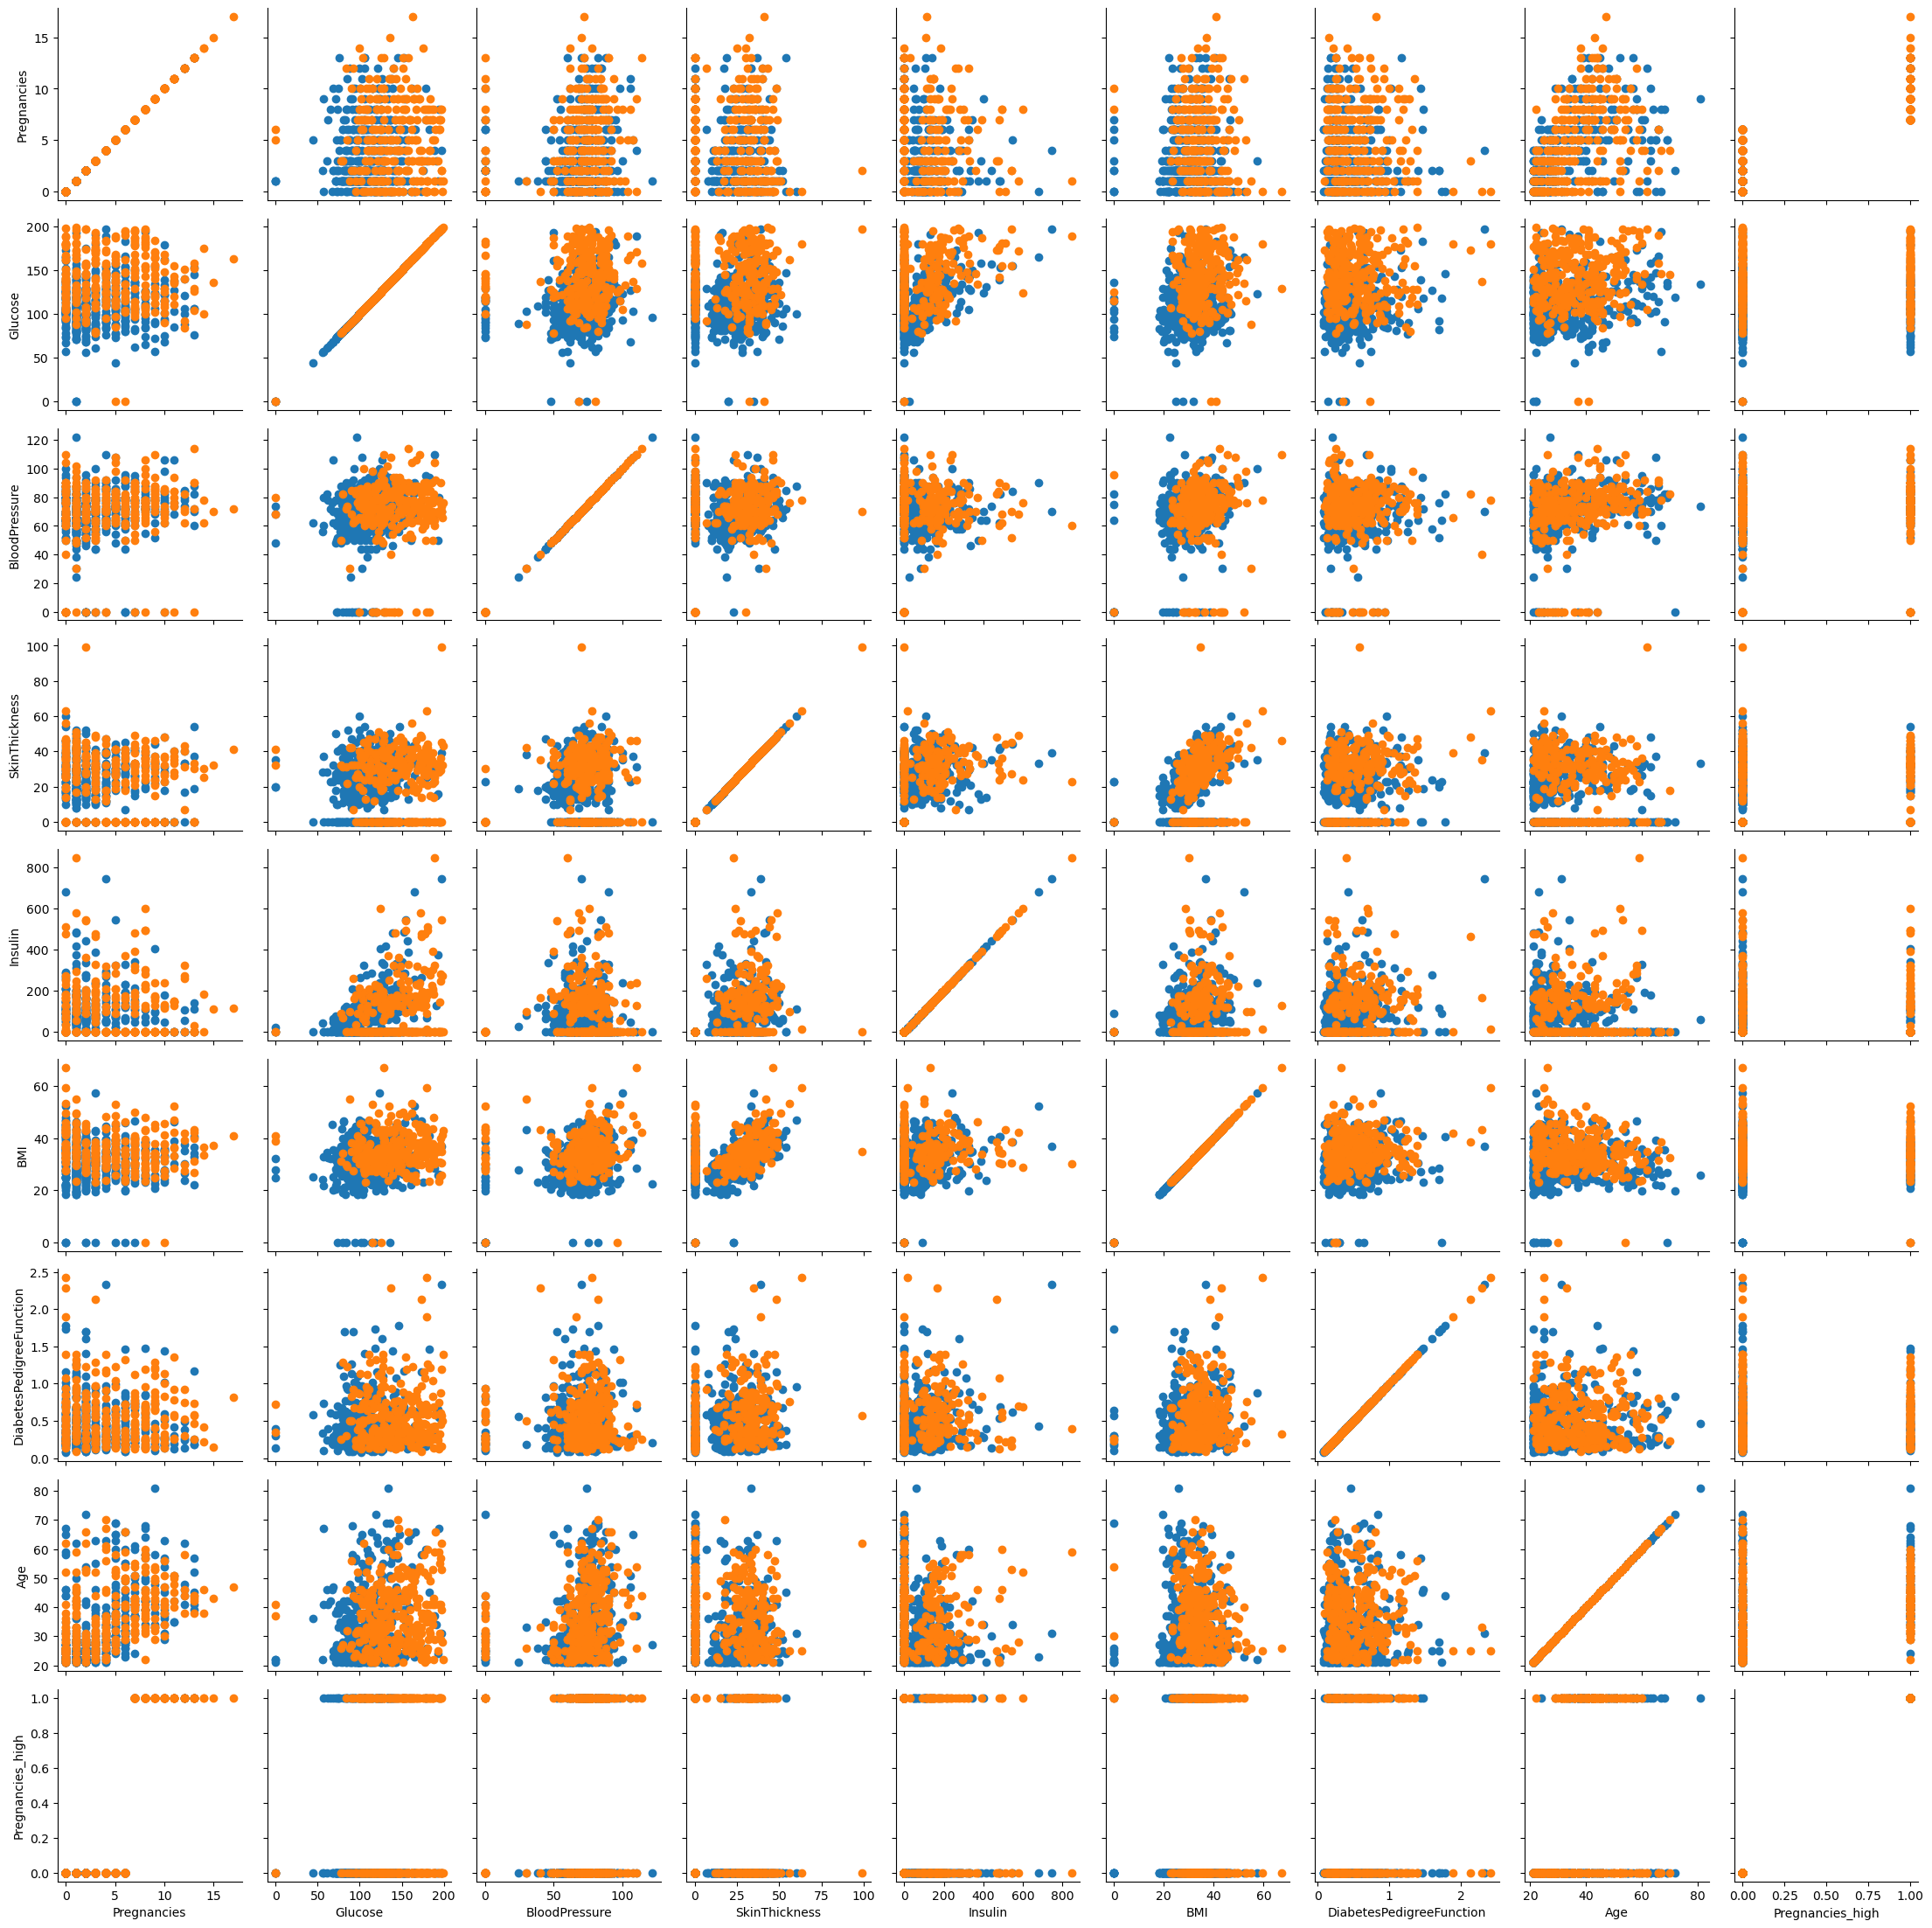

In [129]:
g = sns.PairGrid(df, hue = 'Outcome')
g.map(plt.scatter)

### 상관분석

In [141]:
df_matrix = df.iloc[:,:-2].replace(0, np.nan)
df_matrix['Outcome'] = df['Outcome']
df_matrix.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          NaN    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [142]:
# 상관계수
df_corr = df_matrix.corr()
df_corr.style.background_gradient()

<Axes: >

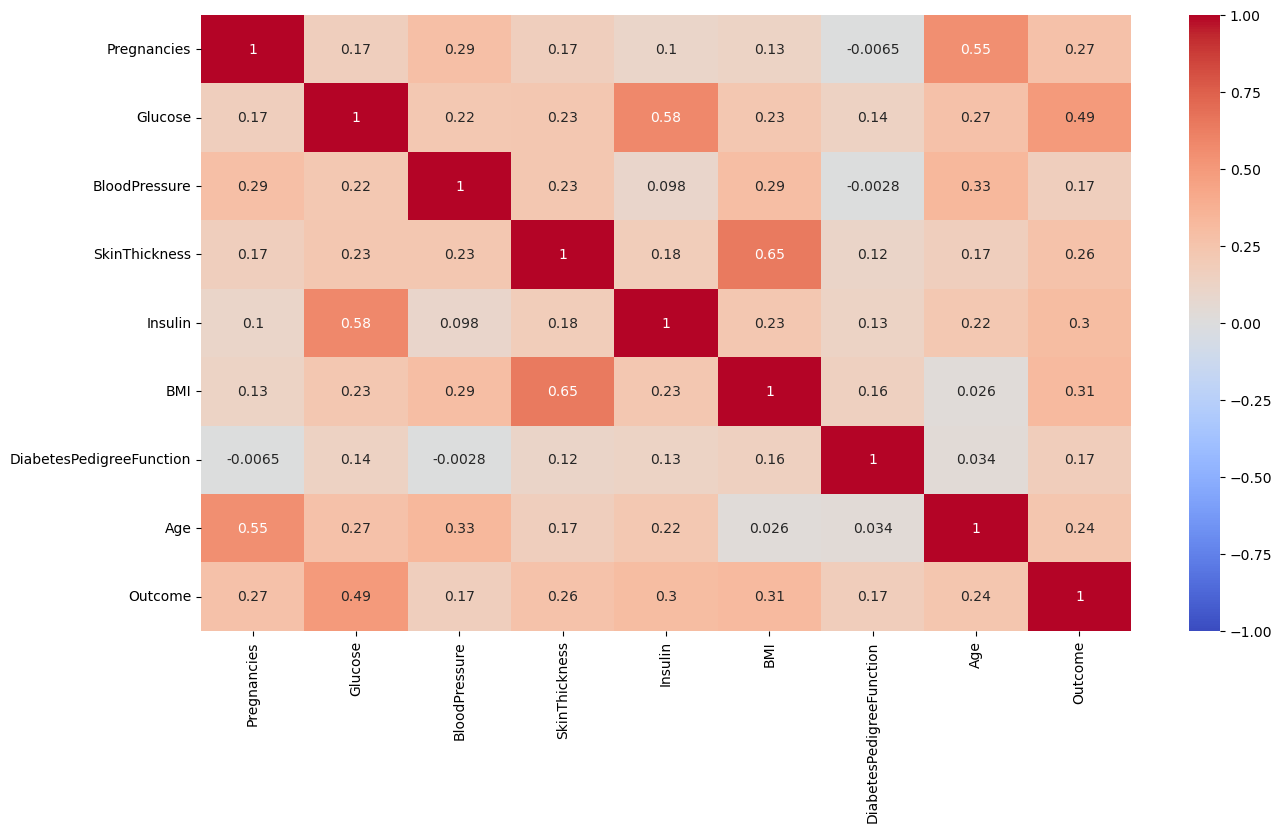

In [144]:
# 상관계수 heatmap
plt.figure(figsize = (15, 8))
sns.heatmap(df_corr, annot = True, vmax = 1, vmin = -1, cmap = 'coolwarm')

In [146]:
# Outcome 수치에 대한 상관계수
df_corr['Outcome']

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

#### 상관계수가 높은 변수끼리 보기

<Axes: xlabel='Insulin', ylabel='Glucose'>

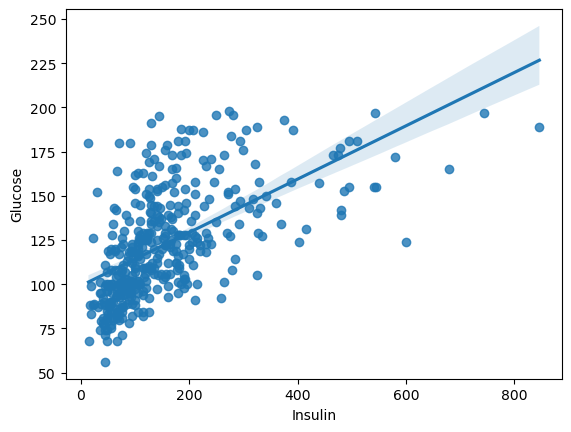

In [147]:
sns.regplot(data = df_matrix, x = 'Insulin', y = 'Glucose')

<Axes: xlabel='Age', ylabel='Pregnancies'>

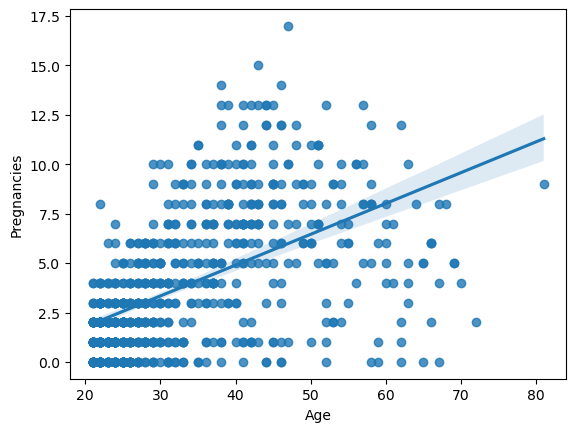

In [149]:
# Age와 Pregnancies를 regplot 그리기
sns.regplot(data = df, x = 'Age', y = 'Pregnancies')

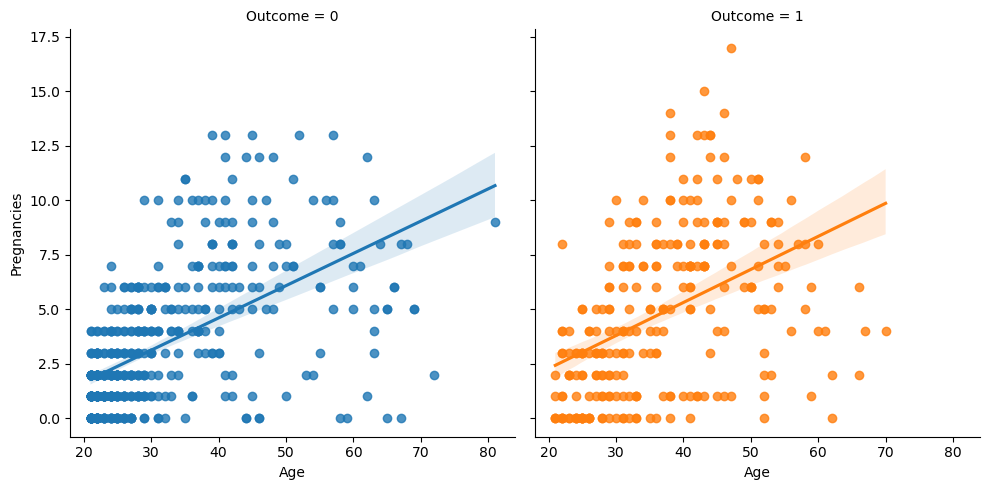

In [152]:
# Age와 Pregnancies를 lmplot 그리고 Outcome에 따라 다른 색상으로 표현
sns.lmplot(data = df, x = 'Age', y = 'Pregnancies', hue = 'Outcome', col = 'Outcome')

In [ ]:
sns.regplot(data = df_matrix, x = 'Insulin', y = 'Glucose', hue = 'Outcome')

# 3주차

### 필요한 라이브러리 로드

In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### 데이터셋 로드

In [269]:
data_path = 'C:/Users/taek5/Desktop/TG/boostcourse/data/'

df = pd.read_csv(data_path+'diabetes.csv')
df.shape

(768, 9)

In [270]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

### Feature Engineering

#### 수치형 변수를 범주형 변수로 만들기

In [271]:
df['Pregnancies_high'] = df['Pregnancies'] > 6
df[['Pregnancies', 'Pregnancies_high']].head()

Pregnancies  Pregnancies_high
0            6             False
1            1             False
2            8              True
3            1             False
4            0             False

In [272]:
# One-Hot-Encoding
# 수치 -> 범주 -> 수치 
df['Age_low'] = df['Age'] < 25
df['Age_middle'] = (df['Age'] >= 25) & (df['Age'] <= 60)
df['Age_high'] = df['Age'] > 60
df[['Age', 'Age_low', 'Age_middle', 'Age_high']].head()

Age  Age_low  Age_middle  Age_high
0   50    False        True     False
1   31    False        True     False
2   32    False        True     False
3   21     True       False     False
4   33    False        True     False

<Axes: xlabel='Age_low', ylabel='count'>

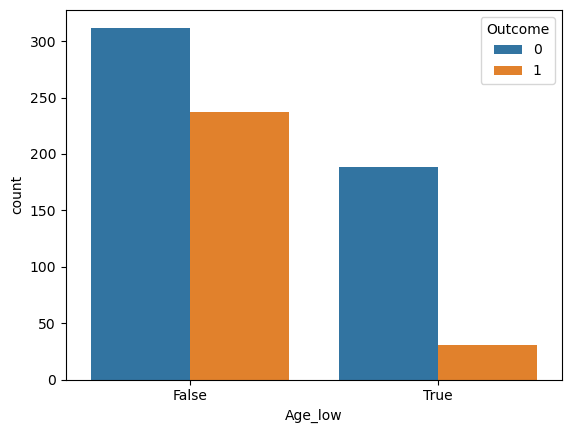

In [273]:
sns.countplot(data = df, x = 'Age_low', hue = 'Outcome')

<Axes: xlabel='Age_middle', ylabel='count'>

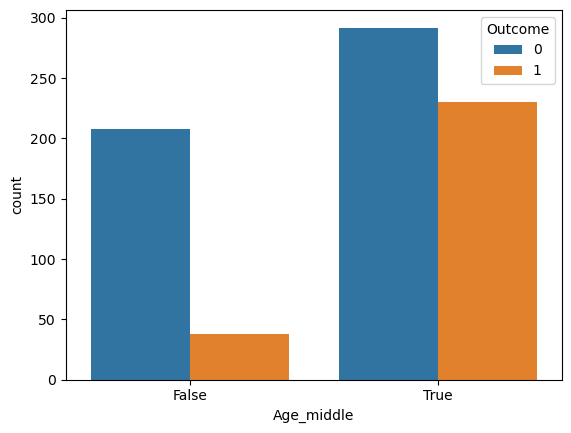

In [274]:
sns.countplot(data = df, x = 'Age_middle', hue = 'Outcome')

<Axes: xlabel='Age_high', ylabel='count'>

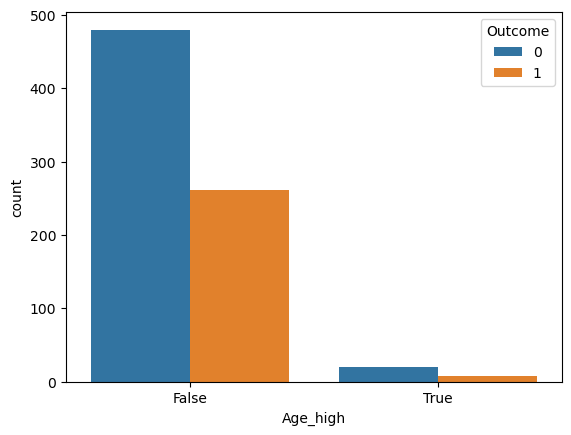

In [275]:
sns.countplot(data = df, x = 'Age_high', hue = 'Outcome')

#### 결측치 다루기

In [276]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [277]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [278]:
df['Insulin_nan'] = df['Insulin'].replace(0, np.nan)
df[['Insulin', 'Insulin_nan']].head()

Insulin  Insulin_nan
0        0          NaN
1        0          NaN
2        0          NaN
3       94         94.0
4      168        168.0

In [279]:
df['Insulin_nan'].isnull().sum()

374

In [280]:
# 결측치 비율
df['Insulin_nan'].isnull().mean()

0.4869791666666667

In [281]:
df.groupby(['Outcome'])['Insulin', 'Insulin_nan'].mean()

C:\Users\taek5\AppData\Local\Temp\ipykernel_22156\3915785670.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Outcome'])['Insulin', 'Insulin_nan'].mean()


Insulin  Insulin_nan
Outcome                         
0         68.792000   130.287879
1        100.335821   206.846154

In [282]:
df.groupby(['Outcome'])['Insulin', 'Insulin_nan'].describe()

C:\Users\taek5\AppData\Local\Temp\ipykernel_22156\1675968121.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Outcome'])['Insulin', 'Insulin_nan'].describe()


Insulin                                                         \
          count        mean         std  min  25%   50%     75%    max   
Outcome                                                                  
0         500.0   68.792000   98.865289  0.0  0.0  39.0  105.00  744.0   
1         268.0  100.335821  138.689125  0.0  0.0   0.0  167.25  846.0   

        Insulin_nan                                                             
              count        mean         std   min    25%    50%     75%    max  
Outcome                                                                         
0             264.0  130.287879  102.482237  15.0   66.0  102.5  161.25  744.0  
1             130.0  206.846154  132.699898  14.0  127.5  169.5  239.25  846.0

In [283]:
df.groupby(['Outcome'])['Insulin', 'Insulin_nan'].agg(['mean', 'median'])

C:\Users\taek5\AppData\Local\Temp\ipykernel_22156\2813521386.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Outcome'])['Insulin', 'Insulin_nan'].agg(['mean', 'median'])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [284]:
# # 결측치 채우기(평균값)
# df.loc[(df['Outcome'] == 0) & (df['Insulin_nan'].isnull()), 'Insulin_nan'] = 130
# df.loc[(df['Outcome'] == 1) & (df['Insulin_nan'].isnull()), 'Insulin_nan'] = 206

In [285]:
# 결측치 채우기(중앙값)
df.loc[(df['Outcome'] == 0) & (df['Insulin_nan'].isnull()), 'Insulin_nan'] = 102.5
df.loc[(df['Outcome'] == 1) & (df['Insulin_nan'].isnull()), 'Insulin_nan'] = 169.5

#### 정규분포 만들기

C:\Users\taek5\AppData\Local\Temp\ipykernel_22156\3663783662.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['Insulin'] > 0, 'Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

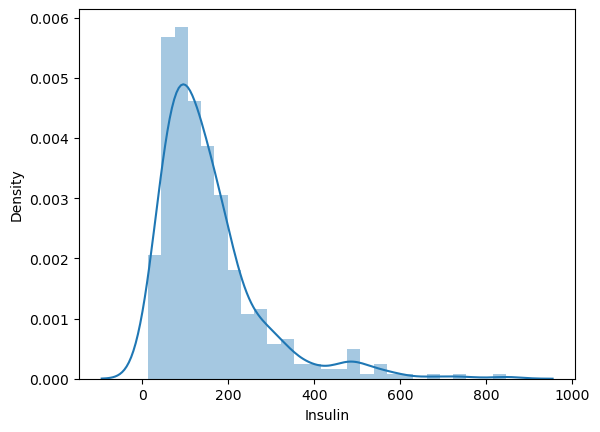

In [286]:
sns.distplot(df.loc[df['Insulin'] > 0, 'Insulin'])

C:\Users\taek5\AppData\Local\Temp\ipykernel_22156\101812887.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.loc[df['Insulin'] > 0, 'Insulin'] + 1))


<Axes: xlabel='Insulin', ylabel='Density'>

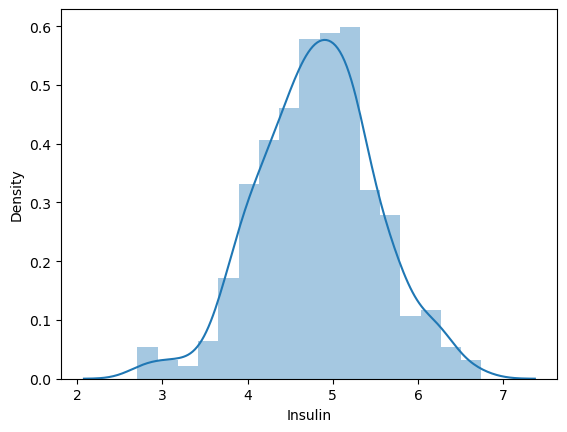

In [287]:
sns.distplot(np.log(df.loc[df['Insulin'] > 0, 'Insulin'] + 1))

C:\Users\taek5\AppData\Local\Temp\ipykernel_22156\2248232018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin_nan'])


<Axes: xlabel='Insulin_nan', ylabel='Density'>

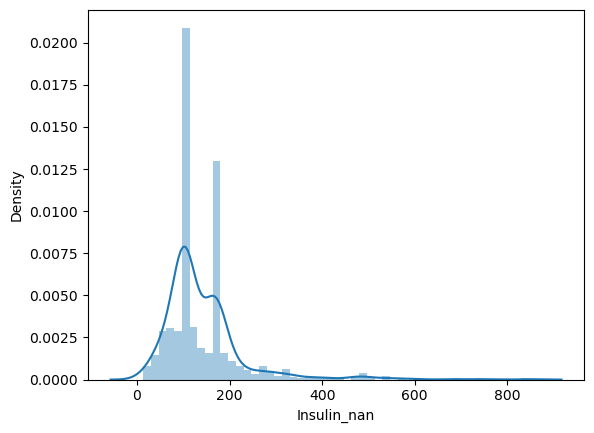

In [288]:
sns.distplot(df['Insulin_nan'])

C:\Users\taek5\AppData\Local\Temp\ipykernel_22156\3858937078.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin_log'])


<Axes: xlabel='Insulin_log', ylabel='Density'>

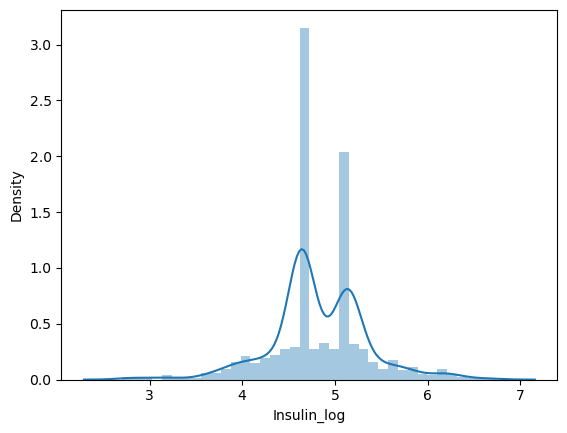

In [289]:
df['Insulin_log'] = np.log(df['Insulin_nan'] + 1)
sns.distplot(df['Insulin_log'])

#### 파생변수 만들기

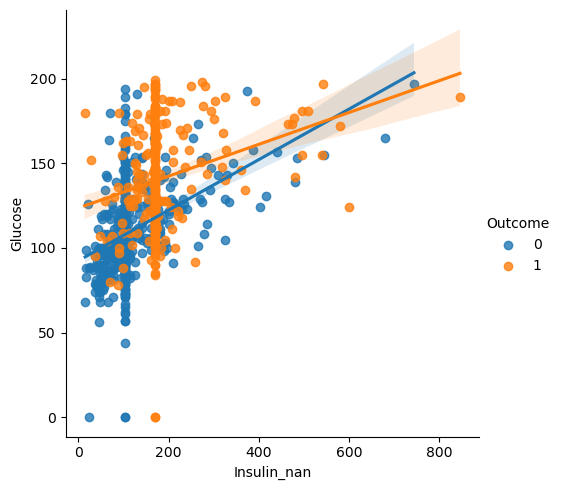

In [290]:
sns.lmplot(data = df, x = 'Insulin_nan', y = 'Glucose', hue = 'Outcome')

In [291]:
df['low_glu_insulin'] = (df['Glucose'] < 100) & (df['Insulin_nan'] <= 102.5)
df['low_glu_insulin'].head()

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [292]:
# 범주형 값에 대한 crosstable
pd.crosstab(df['Outcome'], df['low_glu_insulin'])

low_glu_insulin  False  True 
Outcome                      
0                  332    168
1                  263      5

#### 이상치 다루기

<Axes: >

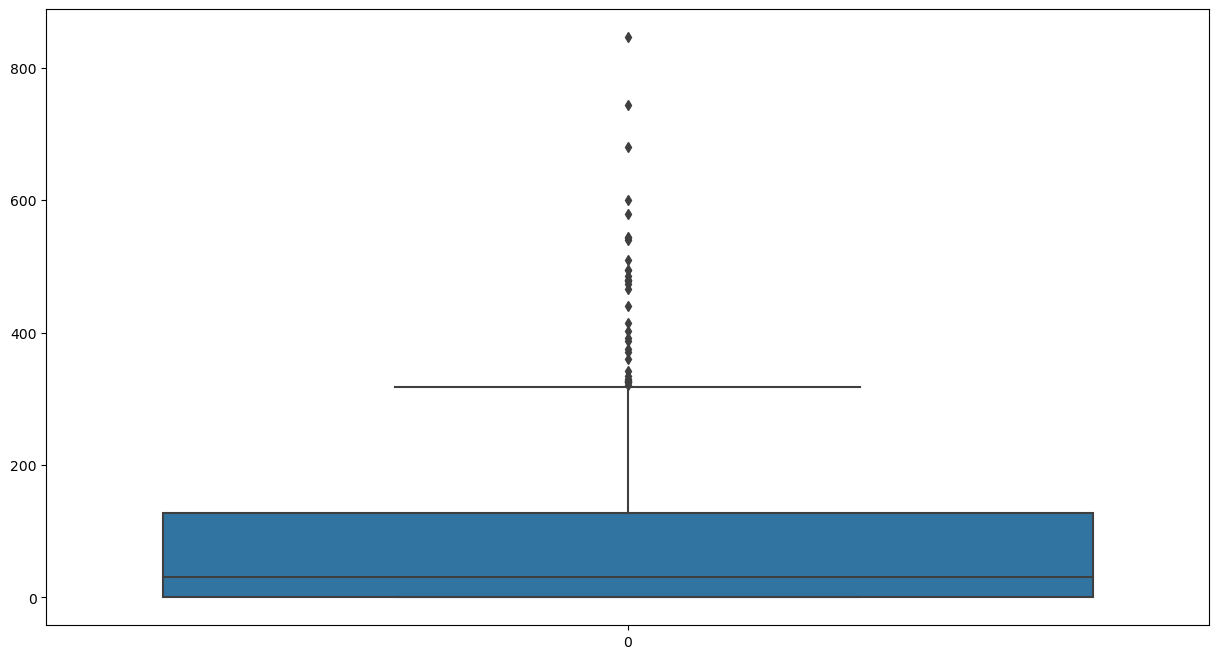

In [293]:
plt.figure(figsize = (15, 8))
sns.boxplot(df['Insulin'])

<Axes: >

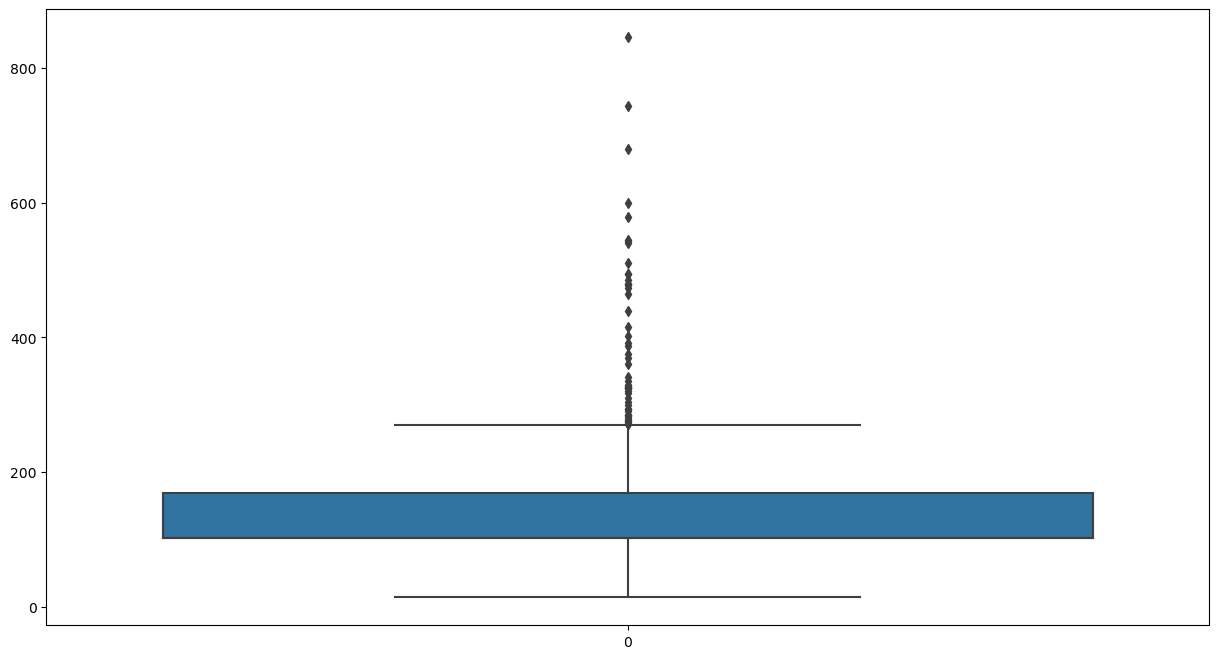

In [294]:
plt.figure(figsize = (15, 8))
sns.boxplot(df['Insulin_nan'])

In [295]:
df['Insulin_nan'].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [296]:
IQR3 = df['Insulin_nan'].quantile(0.75)
IQR1 = df['Insulin_nan'].quantile(0.25)
IQR = IQR3 - IQR1
IQR

67.0

In [297]:
OUT = IQR3 + (1.5 * IQR)
OUT

270.0

In [298]:
df[df['Insulin_nan'] > OUT].shape

(51, 16)

In [299]:
df[df['Insulin_nan'] > 600].shape

(3, 16)

In [300]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

### Scaling

In [301]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Glucose', 'DiabetesPedigreeFunction']])
scale = scaler.transform(df[['Glucose', 'DiabetesPedigreeFunction']])
scale

array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

In [245]:
# df[['Glucose', 'DiabetesPedigreeFunction']] = scale
# df[['Glucose', 'DiabetesPedigreeFunction']].head()

Glucose  DiabetesPedigreeFunction
0  0.848324                  0.468492
1 -1.123396                 -0.365061
2  1.943724                  0.604397
3 -0.998208                 -0.920763
4  0.504055                  5.484909

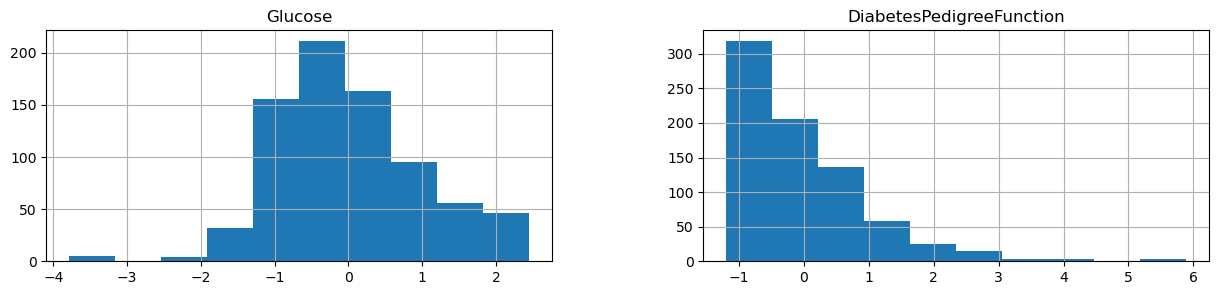

In [246]:
# h = df[['Glucose', 'DiabetesPedigreeFunction']].hist(figsize = (15, 3))

### csv 파일로 저장하기

In [305]:
df.to_csv('./diabetes_feature.csv', index = False)

In [306]:
pd.read_csv('./diabetes_feature.csv')

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Pregnancies_high  Age_low  \
0                       0.627   50        1             False    False   
1                       0.351   31        0             False    False   
2                       0.672   32        1              True    False   
3                       0.167   21        0             False     True   
4                       2.288   33        1             False    False   
..                        ...  ...      ...               ...      ...   
763                     0.171   63        0              True    False   
764                     0.340   27        0             False    False   
765                     0.245   30        0             False    False   
766                     0.349   47        1             False    False   
767                     0.315   23        0             False     True   

     Age_middle  Age_high  Insulin_nan  Insulin_log  low_glu_insulin  
0          True     False        169.5     5.138735            False  
1          True     False        102.5     4.639572             True  
2          True     False        169.5     5.138735            False  
3         False     False         94.0     4.553877             True  
4          True     False        168.0     5.129899            False  
..          ...       ...          ...          ...              ...  
763       False      True        180.0     5.198497            False  
764        True     False        102.5     4.639572            False  
765        True     False        112.0     4.727388            False  
766        True     False        169.5     5.138735            False  
767       False     False        102.5     4.639572             True  

[768 rows x 16 columns]

### 학습, 예측 데이터셋 나누기

In [247]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [248]:
train = df[:split_count].copy()
train.shape

(614, 16)

In [249]:
train[train['Insulin_nan'] < 600].shape

(610, 16)

In [250]:
train = train[train['Insulin_nan'] < 600]
train.shape

(610, 16)

In [251]:
test = df[split_count:].copy()
test.shape

(154, 16)

### 학습, 예측에 사용할 컬럼

In [252]:
feature_names = train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
feature_names.remove('Insulin_log')
feature_names.remove('Outcome')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

### 정답값이자 예측해야 될 값

In [253]:
label_name = 'Outcome'
label_name

'Outcome'

### 학습, 예측 데이터셋 만들기

In [254]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(610, 9)


Glucose  BloodPressure  SkinThickness   BMI  DiabetesPedigreeFunction  \
0  0.848324             72             35  33.6                  0.468492   
1 -1.123396             66             29  26.6                 -0.365061   
2  1.943724             64              0  23.3                  0.604397   
3 -0.998208             66             23  28.1                 -0.920763   
4  0.504055             40             35  43.1                  5.484909   

   Age  Pregnancies_high  Insulin_nan  low_glu_insulin  
0   50             False        169.5            False  
1   31             False        102.5             True  
2   32              True        169.5            False  
3   21             False         94.0             True  
4   33             False        168.0            False

In [255]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [256]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 9)


Glucose  BloodPressure  SkinThickness   BMI  DiabetesPedigreeFunction  \
614  0.535352             74             26  36.1                  0.257084   
615 -0.466156             72              0  25.8                 -0.799958   
616 -0.121888             96              0  28.7                 -0.950964   
617 -1.655448             62             13  20.1                 -0.648952   
618 -0.278373             82             24  28.2                  2.446670   

     Age  Pregnancies_high  Insulin_nan  low_glu_insulin  
614   50              True        144.0            False  
615   27             False        102.5            False  
616   30             False        102.5            False  
617   23             False         15.0             True  
618   50              True        169.5            False

In [257]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

### 머신러닝 알고리즘 가져오기

In [258]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model

DecisionTreeClassifier(random_state=42)

### 학습(훈련)

In [259]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 예측

In [260]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1], dtype=int64)

### 트리 알고리즘 분석하기

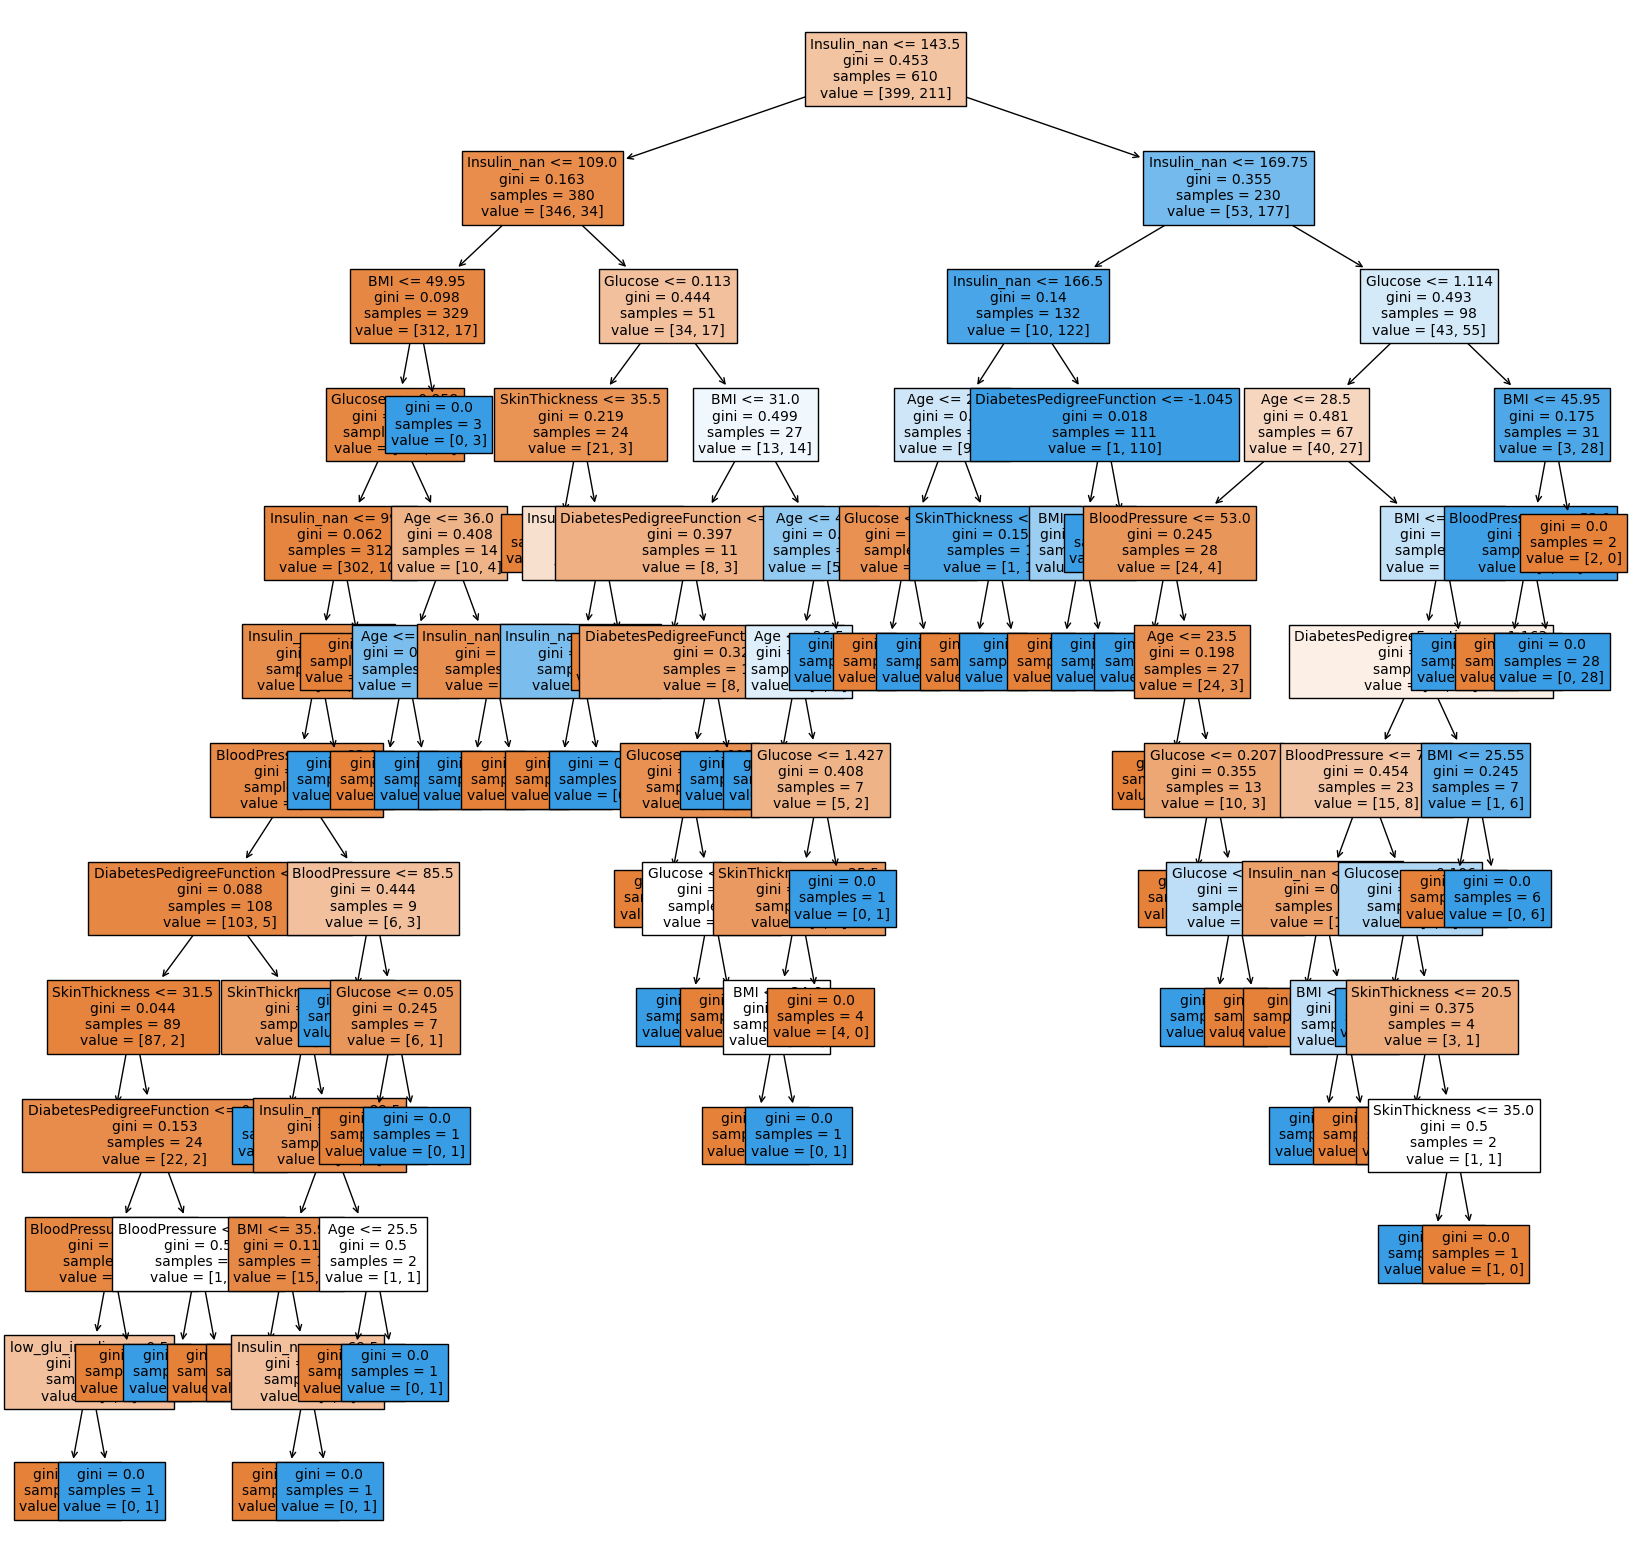

In [261]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20, 20))
tree = plot_tree(model, 
                 feature_names = feature_names,
                 filled = True,
                 fontsize = 10)

In [262]:
# 피처의 중요도 추출하기
model.feature_importances_

array([0.10720708, 0.03829317, 0.02739544, 0.08008031, 0.02662991,
       0.08272508, 0.        , 0.63283861, 0.0048304 ])

<Axes: >

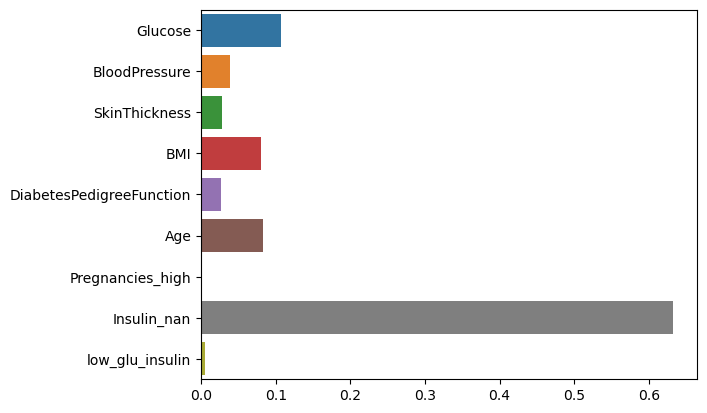

In [263]:
# 피쳐의 중요도 시각화
sns.barplot(x = model.feature_importances_, y = feature_names)

### 정확도(Accuracy) 측정하기

In [264]:
diff_count = abs(y_test - y_predict).sum()
diff_count

15

In [265]:
(len(y_test) - diff_count) / len(y_test) * 100

90.25974025974025

In [266]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

90.25974025974025

In [267]:
model.score(X_test, y_test) * 100

90.25974025974025

# 4주차(학습)

## 최적의 모델과 파라미터 찾기

### 필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### 데이터셋 로드

In [2]:
df = pd.read_csv('./diabetes_feature.csv')
df.shape

(768, 16)

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Pregnancies_high  Age_low  \
0                     0.627   50        1             False    False   
1                     0.351   31        0             False    False   
2                     0.672   32        1              True    False   
3                     0.167   21        0             False     True   
4                     2.288   33        1             False    False   

   Age_middle  Age_high  Insulin_nan  Insulin_log  low_glu_insulin  
0        True     False        169.5     5.138735            False  
1        True     False        102.5     4.639572             True  
2        True     False        169.5     5.138735            False  
3       False     False         94.0     4.553877             True  
4        True     False        168.0     5.129899            False

### 학습과 예측에 사용할 데이터셋 만들기

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [5]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
        'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [6]:
y = df['Outcome']
y.shape

(768,)

In [7]:
from sklearn.model_selection import train_test_split

# train_test_split?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, y_train.shape

((614, 9), (614,))

In [9]:
X_test.shape, y_test.shape

((154, 9), (154,))

### 학습과 예측하기

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


In [24]:
model = DecisionTreeClassifier(max_depth = 4, random_state=42)
y_predict = model.fit(X_train, y_train).predict(X_test)

In [25]:
feature_names = X_train.columns.tolist()

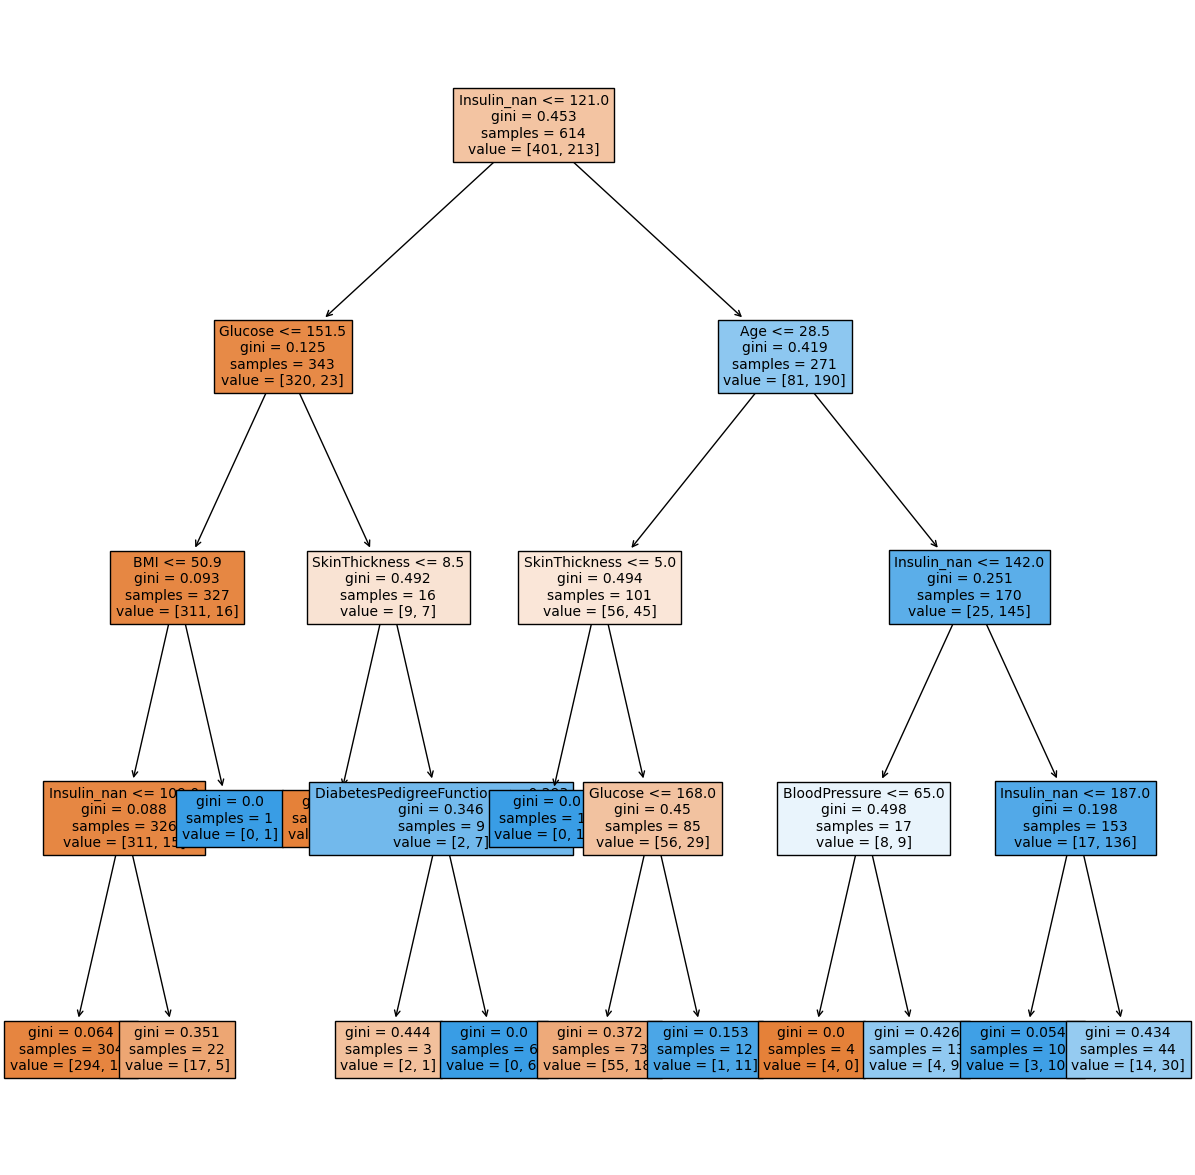

In [26]:
from sklearn.tree import plot_tree

#plot_tree?
plt.figure(figsize = (15, 15))
tree = plot_tree(model, feature_names = feature_names, fontsize = 10, filled = True)

#### Grid Search

In [27]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state = 42)
param_grid = {'max_depth' : range(3, 12), 
              'max_features' : [0.3, 0.5, 0.9, 1]}
clf = GridSearchCV(model, param_grid = param_grid, n_jobs = -1, cv = 5, verbose = 1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.9, 1]},
             verbose=1)

In [28]:
clf.best_params_

{'max_depth': 4, 'max_features': 0.9}

In [29]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=0.9, random_state=42)

In [30]:
clf.best_score_

0.8616153538584566

In [31]:
pd.DataFrame(clf.cv_results_).sort_values(by = 'rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6        0.005880      0.000485         0.002774        0.000456   
14       0.006435      0.001771         0.004225        0.001904   
25       0.005965      0.000556         0.002806        0.000513   
9        0.005478      0.000490         0.002924        0.000493   
1        0.004895      0.000864         0.002460        0.000397   

   param_max_depth param_max_features                                 params  \
6                4                0.9  {'max_depth': 4, 'max_features': 0.9}   
14               6                0.9  {'max_depth': 6, 'max_features': 0.9}   
25               9                0.5  {'max_depth': 9, 'max_features': 0.5}   
9                5                0.5  {'max_depth': 5, 'max_features': 0.5}   
1                3                0.5  {'max_depth': 3, 'max_features': 0.5}   

    split0_test_score  split1_test_score  split2_test_score  \
6            0.821138           0.886179           0.853659   
14           0.829268           0.894309           0.821138   
25           0.853659           0.902439           0.780488   
9            0.837398           0.878049           0.821138   
1            0.780488           0.910569           0.813008   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
6            0.853659           0.893443         0.861615        0.026005   
14           0.878049           0.877049         0.859963        0.029149   
25           0.861789           0.885246         0.856724        0.041834   
9            0.878049           0.868852         0.856697        0.023222   
1            0.853659           0.918033         0.855151        0.053625   

    rank_test_score  
6                 1  
14                2  
25                3  
9                 4  
1                 5

In [32]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [33]:
clf.score(X_test, y_test)

0.8766233766233766

#### RandomSearchCV

In [39]:
model = DecisionTreeClassifier(random_state = 42)

In [59]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([ 4, 10, 15,  5,  3, 13, 16, 15, 14,  6])

In [60]:
max_features = np.random.uniform(0.7, 1.0, 100)

In [61]:
param_distributions = {'max_depth' : max_depth,
                      'max_features' : max_features,
                      'min_samples_split' : list(range(2, 7))}
param_distributions

{'max_depth': array([ 4, 10, 15,  5,  3, 13, 16, 15, 14,  6]),
 'max_features': array([0.79451271, 0.72597133, 0.74343841, 0.87403588, 0.83793296,
        0.88187845, 0.92564375, 0.75782752, 0.77121149, 0.82521519,
        0.80143456, 0.92897213, 0.78463124, 0.9754964 , 0.7341932 ,
        0.89563366, 0.75150748, 0.9757848 , 0.81085794, 0.78134492,
        0.74596225, 0.76406593, 0.71593141, 0.71210713, 0.87865074,
        0.90331869, 0.88855049, 0.8676965 , 0.79573426, 0.9398515 ,
        0.92662243, 0.87813331, 0.92050543, 0.88137394, 0.73357411,
        0.96606932, 0.87820257, 0.93998552, 0.72404435, 0.71824324,
        0.99941338, 0.89051587, 0.94797258, 0.94961807, 0.99209497,
        0.71295266, 0.96760205, 0.89725833, 0.80294191, 0.7917759 ,
        0.78516286, 0.7371471 , 0.87712438, 0.78296896, 0.74982716,
        0.8488795 , 0.88932222, 0.89404612, 0.74582237, 0.9800857 ,
        0.83067841, 0.87874723, 0.79837741, 0.77624876, 0.94720143,
        0.9987393 , 0.81301305, 0.869

In [62]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(model, 
                  param_distributions,
                  n_iter = 100,
                  scoring = 'accuracy',
                  n_jobs = -1,
                  cv = 5,
                  random_state = 42)

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([ 4, 10, 15,  5,  3, 13, 16, 15, 14,  6]),
                                        'max_features': array([0.79451271, 0.72597133, 0.74343841, 0.87403588, 0.83793296,
       0.88187845, 0.92564375, 0.75782752, 0.77121149, 0.82521519,
       0.80143456, 0.92897213, 0.78463124, 0.9754964 , 0.7341932 ,
       0....
       0.99228688, 0.75369727, 0.70666879, 0.70849631, 0.82512478,
       0.86770933, 0.78446058, 0.94606362, 0.98403298, 0.91125097,
       0.83867939, 0.88716214, 0.82941407, 0.7565895 , 0.98140833,
       0.92226318, 0.73411101, 0.79349448, 0.81452459, 0.74443063,
       0.85160671, 0.97127663, 0.89654477, 0.96635781, 0.74823883,
       0.92721347, 0.9718781 , 0.83694511, 0.96043718, 0.99529338]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy')

In [63]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.7957342610832755, 'max_depth': 10}

In [64]:
clf.best_score_

0.8713847794215648

In [65]:
clf.score(X_test, y_test)

0.8571428571428571

In [66]:
pd.DataFrame(clf.cv_results_).sort_values(by = 'rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
23       0.007525      0.001369         0.002044        0.001966   
42       0.006384      0.001589         0.003235        0.001715   
98       0.004169      0.002141         0.004517        0.002529   
29       0.008276      0.003870         0.001904        0.001564   
57       0.005279      0.004261         0.001710        0.001480   

   param_min_samples_split param_max_features param_max_depth  \
23                       4           0.795734              10   
42                       6           0.881878               4   
98                       5           0.825125               4   
29                       3           0.836945               4   
57                       5           0.881374               4   

                                               params  split0_test_score  \
23  {'min_samples_split': 4, 'max_features': 0.795...           0.910569   
42  {'min_samples_split': 6, 'max_features': 0.881...           0.869919   
98  {'min_samples_split': 5, 'max_features': 0.825...           0.869919   
29  {'min_samples_split': 3, 'max_features': 0.836...           0.869919   
57  {'min_samples_split': 5, 'max_features': 0.881...           0.869919   

    split1_test_score  split2_test_score  split3_test_score  \
23           0.886179           0.813008           0.845528   
42           0.886179           0.837398           0.861789   
98           0.886179           0.837398           0.861789   
29           0.886179           0.837398           0.861789   
57           0.886179           0.837398           0.861789   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
23           0.901639         0.871385        0.036731                1  
42           0.885246         0.868106        0.017925                2  
98           0.885246         0.868106        0.017925                2  
29           0.885246         0.868106        0.017925                2  
57           0.885246         0.868106        0.017925                2

### 정확도 측정하기

In [35]:
abs(y_predict - y_test).sum()

19

In [36]:
from sklearn.metrics import accuracy_score

# accuracy_score?
accuracy_score(y_test, y_predict) * 100

87.66233766233766